# **Project Name**    - **Zomato Restaurant Clustering and Sentiment Analysis**


#### **Project Type**    - Unsupervised
#### **Contribution**    - Individual
#### **Team Member  -** Girish R


# **Project Summary -**

This project entailed the utilization of advanced data analytics techniques to gain a deeper understanding of the restaurants and customer feedback on the popular online food delivery platform, Zomato.

The data procured included information such as the restaurant's name, location, cuisines, average cost for two, ratings, and user reviews.

Subsequently, I embarked on the task of data cleaning and preprocessing, which involved the elimination of duplicate entries, addressing missing values, and transforming the data into a format amenable to analysis.

The next step in the project was the implementation of clustering on the restaurant data through the use of the k-means algorithm. The objective of the clustering was to group similar restaurants together and discern patterns within the data. The features employed for the clustering process included the restaurant's location, cuisines, and average cost for two. The number of clusters was determined by utilizing the elbow method.

I then proceeded to conduct sentiment analysis on the user reviews to gain a comprehensive understanding of the overall sentiment towards the restaurants. Certain libraries were utilized to classify the reviews as positive, negative, or neutral. Additionally, I extracted the most recurrent words utilized in the reviews and visualized them through the creation of word clouds.

The outcome of the analysis revealed that the restaurants within the city were grouped into five clusters based on their location, cuisines, and average cost for two. The sentiment analysis uncovered that, generally, customers held a positive sentiment towards the restaurants.

In conclusion, this project exemplifies the utility of clustering and sentiment analysis in gaining a more profound comprehension of restaurant data on Zomato. The insights procured from the analysis can be of immense benefit to both restaurants and customers in making informed decisions. Furthermore, the project can be extended to other cities or even countries to gain insight into the eating habits and preferences of individuals in different regions.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**In today's competitive restaurant industry, it is crucial for companies to understand the market and target the right audience in order to drive growth and success. This project aims to provide a comprehensive solution to this problem by utilizing advanced data analytics and machine learning techniques to cluster Zomato restaurants into segments based on various factors such as cuisine and cost. By understanding the market segments, the company will be able to target the right audience and make data-driven decisions. Additionally, the project will also analyze customer sentiment and reviews, which will account for 40% of the project, to extract valuable insights and identify areas for improvement that can increase customer satisfaction. Overall, this project aims to empower the restaurant industry with a thorough understanding of the market and actionable recommendations for driving business growth.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import seaborn as sns
import math
import time
from wordcloud import WordCloud

from scipy.stats import norm
from scipy import stats
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from sklearn.metrics import roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#importing kmeans
from sklearn.cluster import KMeans

#importing random forest and XgB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Non-negative matrix Factorization
from sklearn.decomposition import NMF


from sklearn.naive_bayes import MultinomialNB

#principal component analysis
from sklearn.decomposition import PCA

#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

#importing stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
#for tokenization
from nltk.tokenize import word_tokenize
# for POS tagging(Part of speech in NLP sentiment analysis)
nltk.download('averaged_perceptron_tagger')

#import stemmer
from nltk.stem.snowball import SnowballStemmer

#import tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

#LDA
!pip install pyLDAvis
import pyLDAvis.sklearn
from sklearn.decomposition import LatentDirichletAllocation

#importing contraction
!pip install contractions
!pip install gensim
import gensim
from gensim import corpora

#importing shap for model explainability
!pip install shap
import shap 

#download small spacy model
# !python -m spacy download en_core_web_sm
# import spacy

# The following lines adjust the granularity of reporting. 
pd.options.display.float_format = "{:.2f}".format

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 6.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 14.1 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [4]:
# Load Dataset
df_hotels = pd.read_csv('/content/drive/MyDrive/UnSupervised ML Project/Zomato Restaurant names and Metadata.csv')
df_reviews = pd.read_csv('/content/drive/MyDrive/UnSupervised ML Project/Zomato Restaurant reviews.csv') 

### Dataset First View

In [5]:
# Dataset First Look
df_hotels.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [6]:
# Review Dataset First Look
df_reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print(f'Total observation and feature for restaurant: {df_hotels.shape}')
print(f'Total observation and feature for review: {df_reviews.shape}')

Total observation and feature for restaurant: (105, 6)
Total observation and feature for review: (10000, 7)


### Dataset Information

In [8]:
# Metadata Dataset Info
print('Restaurant Info')
print('\n')
df_hotels.info()

Restaurant Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [9]:
# Review Dataset Info 
print('Review Info')
print('\n')
df_reviews.info()

Review Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
print(df_hotels.duplicated().sum())

0


In [11]:
# Dataset Duplicate Value Count
print(df_reviews.duplicated().sum())

36


In [12]:
# droping duplicated rows from the user review dataset
df_reviews.drop_duplicates(inplace=True)

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
df_hotels.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [14]:
df_reviews.isnull().sum()

Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64

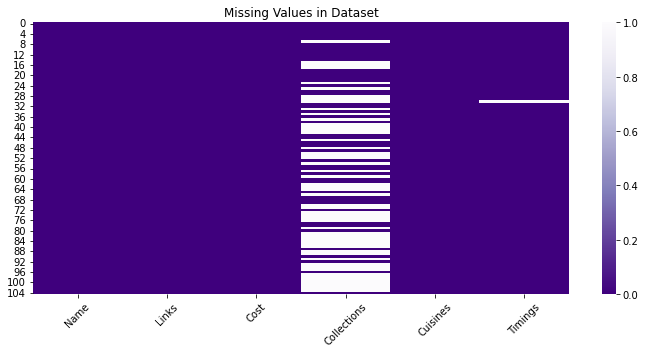

In [15]:
# Visualizing the missing values
plt.figure(figsize=(12, 5))
sns.heatmap(df_hotels.isnull(),cbar=True,cmap="Purples_r")
plt.xticks(rotation= 45)
plt.title('Missing Values in Dataset')
plt.show()

<Axes: >

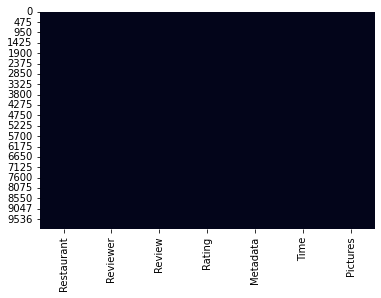

In [16]:
# Visualizing the missing values for reviews
# Checking Null Value by plotting Heatmap
sns.heatmap(df_reviews.isnull(), cbar=False)

### What did you know about your dataset?

### **Restaurant DataSet**

1. There are 105 total observation with 6 different features.

2. Feature like collection and timing has null values.

3. There is no duplicate values i.e., 105 unique data.

4. Feature cost represent amount but has object data type because these values are separated by comma ','.

5. Timing represent operational hour but as it is represented in the form of text has object data type.

### **Review DataSet**

1. There are total 10000 observation and 7 features.

2. Except picture and restaurant feature all others have null values.

3. There are total of 36 duplicate values for two restaurant.

4. Rating represent ordinal data, has object data type should be integer.

5. Timing represent the time when review was posted but show object data time, it should be converted into date time.

## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns Restaurants
df_hotels.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [18]:
# dataset columns Reviews
df_reviews.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [19]:
# Dataset Describe
df_hotels.describe().T

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [20]:
# Dataset Describe Reviews
df_reviews.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Restaurant,9964,100,Beyond Flavours,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reviewer,9962,7446,Parijat Ray,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review,9955,9364,good,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9962,10,5,3832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metadata,9962,2477,1 Review,919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,9962,9782,7/29/2018 20:34,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pictures,9964.00,NaN,NaN,NaN,0.75,2.57,0.00,0.00,0.00,0.00,64.00


### Variables Description 

# **Attributes**
Zomato Restaurant

*   Name : Name of Restaurants
*   Links : URL Links of Restaurants
*   Cost : Per person estimated Cost of dining
*   Collection : Tagging of Restaurants w.r.t. Zomato categories
*   Cuisines : Cuisines served by Restaurants
*   Timings : Restaurant Timings

# **Zomato Restaurant Reviews**

*   Restaurant : Name of the Restaurant
*   Reviewer : Name of the Reviewer
*   Review : Review Text
*   Rating : Rating Provided by Reviewer
*   MetaData : Reviewer Metadata - No. of Reviews and followers
*   Time: Date and Time of Review
*   Pictures : No. of pictures posted with review


### Check Unique Values for each variable.

In [21]:
# Check Unique Values for each variable.
for i in df_hotels.columns.tolist():
  print("No. of unique values in ",i,"is",df_hotels[i].nunique(),".")

No. of unique values in  Name is 105 .
No. of unique values in  Links is 105 .
No. of unique values in  Cost is 29 .
No. of unique values in  Collections is 42 .
No. of unique values in  Cuisines is 92 .
No. of unique values in  Timings is 77 .


In [22]:
# Check Unique Values for each variable for reviews
for i in df_reviews.columns.tolist():
  print("No. of unique values in ",i,"is",df_reviews[i].nunique(),".")

No. of unique values in  Restaurant is 100 .
No. of unique values in  Reviewer is 7446 .
No. of unique values in  Review is 9364 .
No. of unique values in  Rating is 10 .
No. of unique values in  Metadata is 2477 .
No. of unique values in  Time is 9782 .
No. of unique values in  Pictures is 36 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [23]:
# Write your code to make your dataset analysis ready.
#creating copy of both the data
hotel = df_hotels.copy()
review = df_reviews.copy()

# **Restaurant**


In [24]:
#before changing data type for cost checking values
hotel['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [25]:
# Write your code to make your dataset analysis ready.
# changing the data type of the cost function
hotel['Cost'] = hotel['Cost'].str.replace(",","").astype('int64')

In [26]:
#top 5 costlier restaurant
hotel.sort_values('Cost', ascending = False)[['Name','Cost']][:5]

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800
56,Feast - Sheraton Hyderabad Hotel,2500
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
18,10 Downing Street,1900
91,Cascade - Radisson Hyderabad Hitec City,1800


In [27]:
#top 5 economy restaurant
hotel.sort_values('Cost', ascending = False)[['Name','Cost']][-5:]

,Name,Cost
85,Momos Delight,200
29,Hunger Maggi Point,200
101,Sweet Basket,200
89,Mohammedia Shawarma,150
23,Amul,150


In [28]:
#hotels that share same price
hotel_dict = {}
amount = hotel.Cost.values.tolist() 

#adding hotel name based on the price by converting it into list
for price in amount:
    # Get all the rows that have the current price
    rows = hotel[hotel['Cost'] == price]
    hotel_dict[price] = rows["Name"].tolist()

#converting it into dataframe
same_price_hotel_df=pd.DataFrame.from_dict([hotel_dict]).transpose().reset_index().rename(
    columns={'index':'Cost',0:'Name of Restaurants'})

#alternate methode to do the same 
#same_price_hotel_df = hotel.groupby('Cost')['Name'].apply(lambda x: x.tolist()).reset_index()

#getting hotel count
hotel_count = hotel.groupby('Cost')['Name'].count().reset_index().sort_values(
    'Cost', ascending = False)

#merging together
same_price_hotel_df = same_price_hotel_df.merge(hotel_count, how = 'inner', 
                        on = 'Cost').rename(columns = {'Name':'Total_Restaurant'})

#max hotels that share same price
same_price_hotel_df.sort_values('Total_Restaurant', ascending = False)[:5]

,Cost,Name of Restaurants,Total_Restaurant
4,500,"[eat.fit, KFC, Kritunga Restaurant, Karachi Ba...",13
17,600,"[Behrouz Biryani, Karachi Cafe, Hyderabad Chef...",10
20,700,"[Marsala Food Company, Green Bawarchi Restaura...",8
2,1200,"[Over The Moon Brew Company, The Glass Onion, ...",7
8,400,"[Sardarji's Chaats & More, Hotel Zara Hi-Fi, P...",6


In [29]:
#hotels which has max price
same_price_hotel_df.sort_values('Cost', ascending = False)[:5]

,Cost,Name of Restaurants,Total_Restaurant
26,2800,[Collage - Hyatt Hyderabad Gachibowli],1
22,2500,[Feast - Sheraton Hyderabad Hotel],1
12,1900,"[10 Downing Street, Jonathan's Kitchen - Holid...",2
25,1800,[Cascade - Radisson Hyderabad Hitec City],1
27,1750,[Zega - Sheraton Hyderabad Hotel],1


In [30]:
# spliting the cusines and storing in list 
cuisine_value_list = hotel.Cuisines.str.split(', ')

In [31]:
# storing all the cusines in a dict 
cuisine_dict = {}
for cuisine_names in cuisine_value_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:  
            cuisine_dict[cuisine]=1 

In [32]:
# converting the dict to a data frame 
cuisine_df=pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(
    columns={'index':'Cuisine',0:'Number of Restaurants'})

In [33]:
#top 5 cuisine
cuisine_df.sort_values('Number of Restaurants', ascending =False)[:5]

,Cuisine,Number of Restaurants
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15


In [34]:
# spliting the cusines and storing in list 
Collections_value_list = hotel.Collections.dropna().str.split(', ')

In [35]:
# storing all the cusines in a dict 
Collections_dict = {}
for collection in Collections_value_list:
    for col_name in collection:
        if (col_name in Collections_dict):
            Collections_dict[col_name]+=1
        else:  
            Collections_dict[col_name]=1

In [36]:
# converting the dict to a data frame 
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(
    columns={'index':'Tags',0:'Number of Restaurants'})

In [37]:
#top 5 collection
Collections_df.sort_values('Number of Restaurants', ascending =False)[:5]

,Tags,Number of Restaurants
2,Great Buffets,11
0,Food Hygiene Rated Restaurants in Hyderabad,8
5,Live Sports Screenings,7
6,Hyderabad's Hottest,7
1,Corporate Favorites,6


# **Reviews**

In [38]:
#in order to change data type for rating checking values
review.Rating.value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [39]:
#changing data type for each rating since had value as interger surrounded by inverted comma
#since there is one rating as like converting it to 0 since no rating is 0 then to median
review.loc[review['Rating'] == 'Like'] = 0
#changing data type for rating in review data
review['Rating'] = review['Rating'].astype('float')

In [40]:
#since there is one rating as like converting it to median
review.loc[review['Rating'] == 0] = review.Rating.median()

In [41]:
#changing date and extracting few feature for manipulation

review['Reviewer_Total_Review'],review['Reviewer_Followers']=review['Metadata'].str.split(',').str
review['Reviewer_Total_Review'] = pd.to_numeric(review['Reviewer_Total_Review'].str.split(' ').str[0])
review['Reviewer_Followers'] = pd.to_numeric(review['Reviewer_Followers'].str.split(' ').str[1])
review['Time']=pd.to_datetime(review['Time'])
review['Review_Year'] = pd.DatetimeIndex(review['Time']).year
review['Review_Month'] = pd.DatetimeIndex(review['Time']).month
review['Review_Hour'] = pd.DatetimeIndex(review['Time']).hour

In [42]:
#Average engagement of restaurants
avg_hotel_rating = review.groupby('Restaurant').agg({'Rating':'mean',
        'Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
avg_hotel_rating

,Restaurant,Rating,Total_Review
0,4.00,4.00,1
1,10 Downing Street,3.80,100
2,13 Dhaba,3.48,100
3,"3B's - Buddies, Bar & Barbecue",4.76,100
4,AB's - Absolute Barbecues,4.88,100
...,...,...,...
96,Urban Asia - Kitchen & Bar,3.65,100
97,Yum Yum Tree - The Arabian Food Court,3.56,100
98,Zega - Sheraton Hyderabad Hotel,4.45,100
99,Zing's Northeast Kitchen,3.65,100


In [43]:
#usless data
review[review['Restaurant'] == 4.0]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour
7601,4.00,4.00,4.00,4.00,4.00,1970-01-01 00:00:00.000000004,4,NaN,NaN,1970.00,1.00,0.00


In [44]:
#checking hotel count as total hotel in restaurant data was 105
review.Restaurant.nunique()

101

In [45]:
#finding hotel without review
hotel_without_review = [name for name in hotel.Name.unique().tolist() 
       if name not in review.Restaurant.unique().tolist()]
hotel_without_review

['IndiBlaze',
 'Sweet Basket',
 'Angaara Counts 3',
 'Wich Please',
 'Republic Of Noodles - Lemon Tree Hotel']

In [46]:
#top 5 most engaging or rated restaurant
avg_hotel_rating.sort_values('Rating', ascending = False)[:5]

,Restaurant,Rating,Total_Review
4,AB's - Absolute Barbecues,4.88,100
12,B-Dubs,4.81,100
3,"3B's - Buddies, Bar & Barbecue",4.76,100
68,Paradise,4.70,100
36,Flechazo,4.66,100


In [47]:
#top 5 lowest rated restaurant
avg_hotel_rating.sort_values('Rating', ascending = True)[:5]

,Restaurant,Rating,Total_Review
42,Hotel Zara Hi-Fi,2.40,100
11,Asian Meal Box,2.58,100
67,Pakwaan Grand,2.71,100
58,Mathura Vilas,2.82,100
15,Behrouz Biryani,2.83,100


In [48]:
#Finding the most followed critic
most_followed_reviewer = review.groupby('Reviewer').agg({'Reviewer_Total_Review':'max',
      'Reviewer_Followers':'max', 'Rating':'mean'}).reset_index().rename(columns = {
          'Rating':'Average_Rating_Given'}).sort_values('Reviewer_Followers', ascending = False)
most_followed_reviewer[:5]

,Reviewer,Reviewer_Total_Review,Reviewer_Followers,Average_Rating_Given
5464,Satwinder Singh,186.00,13410.00,3.67
1702,Eat_vth_me,60.00,13320.00,5.00
5236,Samar Sardar,8.00,11329.00,3.50
1788,Foodies Hyderabad,31.00,9494.00,4.50
6230,Srinivas,34.00,7628.00,3.71


In [49]:
#finding which year show maximum engagement
hotel_year = review.groupby('Review_Year')['Restaurant'].apply(lambda x: x.tolist()).reset_index()
hotel_year['Count']= hotel_year['Restaurant'].apply(lambda x: len(x))
hotel_year

,Review_Year,Restaurant,Count
0,1970.00,[4.0],1
1,2016.00,"[Labonel, Labonel, Labonel, Labonel, Labonel, ...",43
2,2017.00,"[KS Bakers, KS Bakers, KS Bakers, KS Bakers, K...",213
3,2018.00,"[Shah Ghouse Spl Shawarma, Shah Ghouse Spl Sha...",4903
4,2019.00,"[Beyond Flavours, Beyond Flavours, Beyond Flav...",4802


In [50]:
#merging both data frame
hotel = hotel.rename(columns = {'Name':'Restaurant'})
merged = hotel.merge(review, on = 'Restaurant')
merged.shape

(9963, 17)

In [51]:
#Price point of restaurants
price_point = merged.groupby('Restaurant').agg({'Rating':'mean',
        'Cost': 'mean'}).reset_index().rename(columns = {'Cost': 'Price_Point'})

In [52]:
#price point for high rated restaurants
price_point.sort_values('Rating',ascending = False)[:5]

,Restaurant,Rating,Price_Point
3,AB's - Absolute Barbecues,4.88,1500.00
11,B-Dubs,4.81,1600.00
2,"3B's - Buddies, Bar & Barbecue",4.76,1100.00
67,Paradise,4.70,800.00
35,Flechazo,4.66,1300.00


In [53]:
#price point for lowest rated restaurants
price_point.sort_values('Rating',ascending = True)[:5]

,Restaurant,Rating,Price_Point
41,Hotel Zara Hi-Fi,2.40,400.00
10,Asian Meal Box,2.58,200.00
66,Pakwaan Grand,2.71,400.00
57,Mathura Vilas,2.82,500.00
14,Behrouz Biryani,2.83,600.00


In [54]:
#rating count by reviewer
rating_count_df = pd.DataFrame(review.groupby('Reviewer').size(), columns=[
                                                                "Rating_Count"])
rating_count_df.sort_values('Rating_Count', ascending = False)[:5]

,Rating_Count
Reviewer,
Parijat Ray,13
Ankita,13
Kiran,12
Vedant Killa,11
Jay Mehta,11


### What all manipulations have you done and insights you found?

Firstly, I started with changing data types for cost and rating. In rating there was only one rating which was string or has value of like so I change it into median of the rating. This was done to make data consistent.

Restaurant data : In this dataset I first figured out 5 costlier restaurant in which Collage - Hyatt Hyderabad Gachibowli has maximum price of 2800 and then found the lowest which is Amul with price of 150. Then I found how many hotel share same price i.e., 13 hotel share 500 price. North indian cuisine with great buffet tags is mostly used in hotels.

Review data : In this dataset I found famous or restaurant that show maximum engagement. Followed by that I found most followed critic which was Satwinder Singh who posted total of 186 reviews and had followers of 13410 who gives and average of 3.67 rating for each order he makes. Lastly I also found in year 2018 4903 hotels got reviews.

Then I merged the two dataset together to figure out the price point for the restaurant, top rated restaurant AB's - Absolute Barbecues has a price point of 1500 and the low rated Hotel Zara Hi-Fi has price point of 400.

In order to exactly understand why even with price point of 1500 these hotel has maximum number of rating and sentiment of those rating need to extract words from the text and do futher analysis of the review and then followed by forming clusters so that one can get recommendation about top quality restaurants.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  **Univariate Analysis**

Text(0.5, 1.0, 'Distribution Estimated Cost of dining')

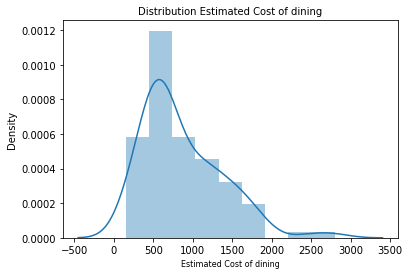

In [55]:
# Chart - 1 visualization code
#distribution of Cost of Dining 
sns.distplot(x=hotel['Cost'])
plt.xlabel('Estimated Cost of dining',size=8)
plt.title('Distribution Estimated Cost of dining',size=10)

##### 1. Why did you pick the specific chart?

**DISTRIBUTION PLOT**

Cost is a numerical feature, and we utilised a distribution plot to see how the cost of dining varied across all restaurants.

##### 2. What is/are the insight(s) found from the chart?

From the distribution curve it can be observed that most of restaurants have cost of dinning in the ranging from Rs.200-Rs.1000 and the median cost is around Rs.700

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This finding regarding the cost distribution can be useful in grouping clients based on their dining costs.

#### Chart - 2 **Price Point and Maximum Engagement**


In [56]:
# Chart - 2 visualization code
#geting the top 10 hotel that show maximum engagement
most_engaged_hotel = price_point.sort_values('Rating', ascending = False)

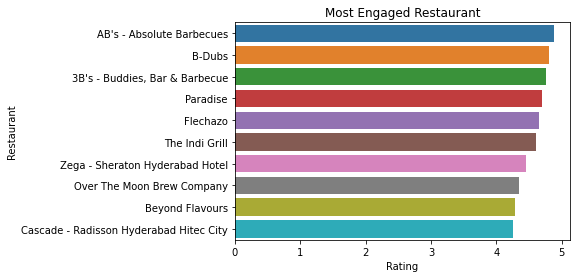

In [57]:
# Chart - 2 visualization code for most liked
sns.barplot(data = most_engaged_hotel[:10], x = 'Rating', y = 'Restaurant')
plt.title('Most Engaged Restaurant')
plt.show()

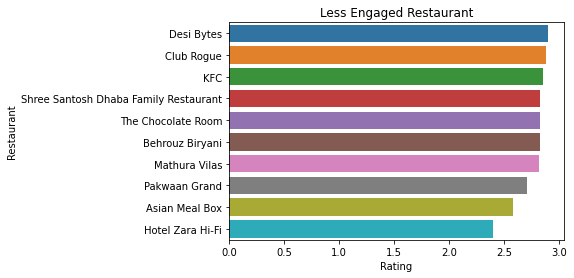

In [58]:
#chart for less liked hotels
sns.barplot(data = most_engaged_hotel[-10:], x = 'Rating', y = 'Restaurant')
plt.title('Less Engaged Restaurant')
plt.show()

##### 1. Why did you pick the specific chart?

**Barplot**

I picked barplot for the above graph because it show frequency level for different category.

##### 2. What is/are the insight(s) found from the chart?

AB's - Absolute Barbecues, show maximum engagement and retention as it has maximum number of rating on average and Hotel Zara Hi-Fi show lowest engagement as has lowest average rating.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Engagement and retention for any business is very much important as profit and scalability for any business depend upon retention of customers. Maximum retention means people prefer to use the same brand over others.

Some restaurant show less rating which can show negative growth if not monitored why they recieve less order for example KFC is listed in low rated it is sure they have different outlet and their own outsourcing and lised here because of the popularity of the app and to increase their sale and demand but are not giving 100% dedication to the platform to generate revenue.

#### Chart - 3

Text(0.5, 1.0, 'Count of Restuarants as per the Ratings')

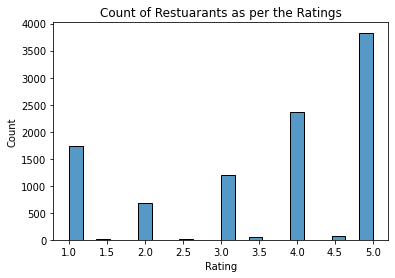

In [59]:
# frequency distribution of Ratings
sns.histplot(x= review['Rating'])
plt.xlabel('Rating')
plt.title('Count of Restuarants as per the Ratings')

##### 1. Why did you pick the specific chart?

**HISTOGRAM**

We picked histogram because we needed to count the number of restaurants based on the ratings given by the reviewers.

##### 2. What is/are the insight(s) found from the chart?

From the univariate analysis of ratings column it is evident that most of the restaurants have been rated 5 followed by ratings of 4

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see there are alot of restaurants with ratings 1 to 3 that need to improved overall specifically restaurants with 1 rating.

#### Chart - 4 **Top seelling Cuisine**

In [60]:
#list of all cuisine
cuisine_list = cuisine_df.sort_values('Number of Restaurants', ascending = False)['Cuisine'].tolist()[:5]

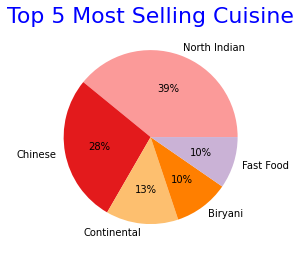

In [61]:
# Chart - 4 visualization code pie chart for top 5 mpst selling cuisine
data = cuisine_df.sort_values('Number of Restaurants', ascending = False)[
    'Number of Restaurants'].tolist()[:5]
labels = cuisine_list

#define Seaborn color palette to use
colors = sns.color_palette('Paired')[4:9]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Selling Cuisine', size =22, color= 'blue')
plt.show()

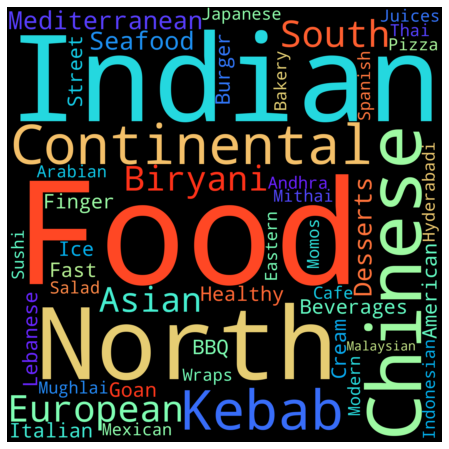

In [62]:
#wordcloud for Cuisine
# storind all cuisine in form of text
plt.figure(figsize=(15,8))
text = " ".join(name for name in cuisine_df.Cuisine )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 2000, height = 2000,collocations = False,
                       colormap='rainbow',background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");

In [63]:
# #creating variable to store restaurant and cuisine from hotel dataset
cproduct = hotel[['Restaurant','Cost',	'Cuisines']].copy()
# #splitting cuisines 
cproduct['Cuisines'] = cproduct['Cuisines'].str.split(',')
# #exploding the cuisine list from above to separate row
cproduct = cproduct.explode('Cuisines')
# #removing trailing spaces
cproduct['Cuisines'] = cproduct['Cuisines'].apply(lambda x: x.strip())
# #grouping cuisines and then making list of restaurants
cprod = cproduct.groupby('Cuisines')['Restaurant'].apply(lambda x: x.tolist()).reset_index()
# # cproduct['Cuisines'].unique()
cprod['Restaurant_Count'] = cprod['Restaurant'].apply(lambda x: len(x))
cprod[cprod['Restaurant_Count']==1].sort_values('Restaurant_Count', ascending = False)

,Cuisines,Restaurant,Restaurant_Count
16,Goan,[The Fisherman's Wharf],1
17,Healthy Food,[eat.fit],1
20,Indonesian,[Shanghai Chef 2],1
23,Juices,[Pista House],1
25,Lebanese,[Shah Ghouse Spl Shawarma],1
26,Malaysian,[Republic Of Noodles - Lemon Tree Hotel],1
28,Mexican,[Mustang Terrace Lounge],1
29,Mithai,[Sweet Basket],1
33,North Eastern,[Zing's Northeast Kitchen],1
35,Pizza,[Domino's Pizza],1


##### 1. Why did you pick the specific chart?

**PIE CHART**

Here I choose to use pie chart because it show proportion of each quantity and used wordcloud because it show all text and highlight the most frequent words.

##### 2. What is/are the insight(s) found from the chart?

Based on the above chart it is clear that most of the hotel sell North Indian food followed by chinese.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying the Commoditized Cuisine plays an important role as it helps in identifying the challenge or Competitive Advantage i.e., Knowing which cuisines are commoditized allows a restaurant or food business to differentiate themselves from their competitors by offering unique and non-commoditized options.

If a cuisine is commoditized, the prices for ingredients and labor for that cuisine may be higher than for non-commoditized cuisines. Identifying these commoditized cuisines can help a business to control costs by focusing on non-commoditized options or finding ways to lower the cost of commoditized items.

Identifying commoditized cuisines can also provide insight into consumer preferences, which can be used to make informed decisions about menu offerings, pricing, and promotions.

Plotting a pie chart of cuisine types can help to identify the most popular cuisine types among its customers. This information can be used to make strategic decisions about which cuisines to focus on promoting and expanding. For example, as the significant portion of customers are searching for north indian restaurants, Zomato could focus on adding more north indian restaurants to its platform and promoting them to customers.

Similarly, a word cloud of cuisine can help Zomato identify the most frequently mentioned cuisine types in customer reviews. This can provide insight into which cuisines are most popular and well-regarded among customers, and which cuisines may need improvement.

However, these types of charts do not provide all the information about the business, and can not be the only decision making factor. For example, a pie chart showing that a certain cuisine is popular does not tell us about the profitability of that cuisine or the competition in that category. The same goes for word cloud, it only shows us the frequency of the cuisine mentioned, it can not tell us if the mentions are positive or negative.

Additionally, these charts do not provide information about the other factors that can impact the business such as market trends, consumer preferences, and economic conditions. Therefore, it's important for Zomato to consider other data and information when making strategic decisions.

#### Chart - 5 **Most used Tags**

In [64]:
#list of all collection
collection_list = Collections_df.sort_values('Number of Restaurants', 
                          ascending = False)['Tags'].tolist()[:5]

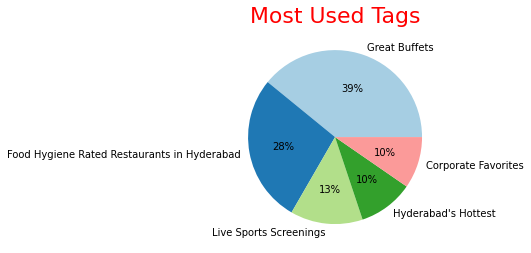

In [65]:
# Chart - 7 visualization code
# Chart - 7 visualization code pie chart for top 5 mpst selling cuisine
data = cuisine_df.sort_values('Number of Restaurants', ascending = False)[
    'Number of Restaurants'].tolist()[:5]
labels = collection_list

#define Seaborn color palette to use
colors = sns.color_palette('Paired')[:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Most Used Tags', size =22, color= 'red')
plt.show()


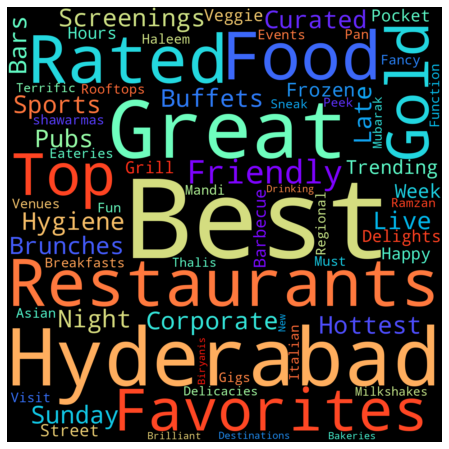

In [66]:
#wordcloud for Cuisine
# storind all cuisine in form of text
plt.figure(figsize=(15,8))
text = " ".join(name for name in Collections_df.Tags )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, 
                      colormap='rainbow', background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");

##### 1. Why did you pick the specific chart?

The pie chart provides a clear and simple way to see the proportion of different food attributes, making it easy to identify the most popular attributes and compare them to one another. It also allows for a quick comparison of the popularity of different attributes, and can be useful in identifying patterns or trends in the data.

On the other hand, a word cloud displays the most frequently mentioned attributes in a way that is visually striking and easy to understand. It is useful for identifying the most frequently mentioned attributes and can be used to quickly identify patterns and trends in customer reviews.

Both charts, when used together, can provide a comprehensive understanding of customer reviews and can be used to identify customer preferences, which can help Zomato to make strategic decisions to improve their business.

##### 2. What is/are the insight(s) found from the chart?

Great Buffets is the most frequently used tags and other tags like great, best, north, Hyderabad is also used in large quantity.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Plotting a pie chart of tags used to describe food can help a restaurant review and food delivery platform Zomato to identify the most popular adjectives used to describe the food. This information can be used to make strategic decisions about which food attributes to focus on promoting and expanding. For example, if a significant portion of customers are describing the food as "delicious" or "fresh", Zomato could focus on adding more restaurants that are known for their delicious and fresh food and promoting them to customers.

Similarly, a word cloud of tags used to describe food can help Zomato identify the most frequently mentioned food attributes in customer reviews. This can provide insight into which attributes are most popular and well-regarded among customers, and which attributes may need improvement.

However, it's important to note that these types of charts do not provide all the information about the business, and can not be the only decision making factor. For example, a pie chart showing that a certain adjective is popular does not tell us about the profitability of that adjective or the competition in that category. The same goes for word cloud, it only shows us the frequency of the adjective mentioned, it can not tell us if the mentions are positive or negative.

Additionally, these charts do not provide information about the other factors that can impact the business such as market trends, consumer preferences, and economic conditions. Therefore, it's important for Zomato to consider other data and information when making strategic decisions. Also, it's important to note that the data used for creating these charts should be cleaned and validated, as the results may be biased if the data is not accurate or complete.

### Chart - 6 **Affordable price restaurants**

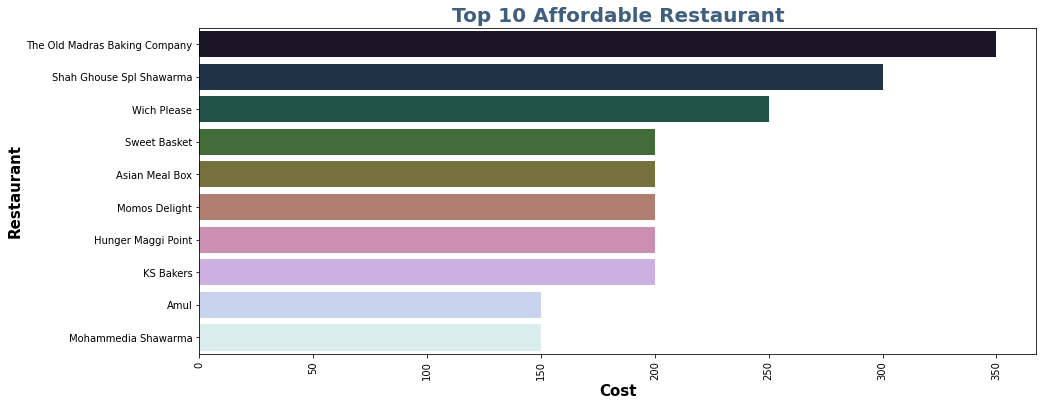

In [67]:
# Chart - 6 visualization code
# Affordable price restaurants
plt.figure(figsize=(15,6))
top_10_affor_rest=hotel[['Restaurant','Cost']].groupby('Restaurant',as_index=False).sum().sort_values(by='Cost',ascending=False).tail(10)
x = top_10_affor_rest['Cost']
y = top_10_affor_rest['Restaurant']
plt.title("Top 10 Affordable Restaurant",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Restaurants",weight='bold',fontsize=15)
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='cubehelix')
plt.show()

1.What is/are the insight(s) found from the chart?

From the above graph we can see the affordable Restaurants with The old Madras Baking Company at the top which is most affordable according to the given dataset

### Chart -7 **Top Expensive Restaurant**

In [68]:
top_10_costly_rest=hotel[['Restaurant','Cost']].groupby('Restaurant',as_index=False).sum().sort_values(by='Cost',ascending=False).head(10)

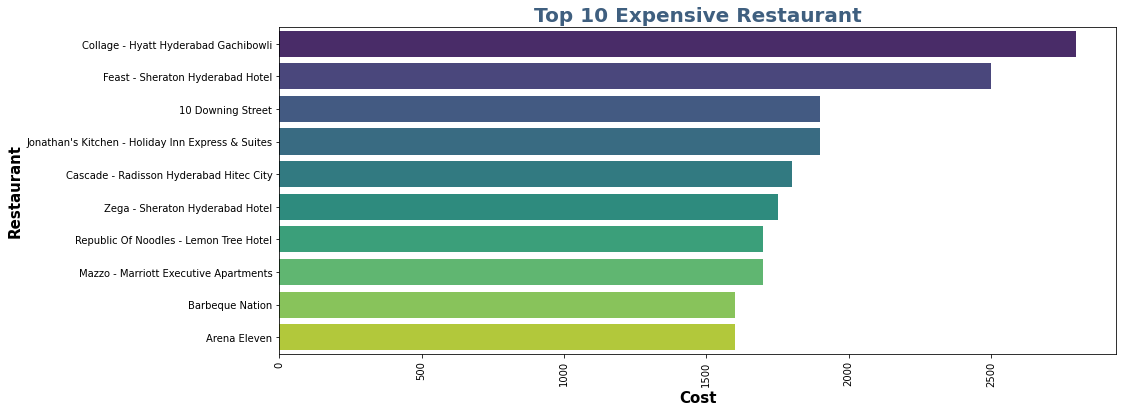

In [69]:
# Chart - 5 visualization code
# Top 10 Expensive Restaurants
plt.figure(figsize=(15,6))
x = top_10_costly_rest['Cost']
y = top_10_costly_rest['Restaurant']
plt.title("Top 10 Expensive Restaurant",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Restaurants",weight='bold',fontsize=15)
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='viridis')
plt.show()

1.Why did you pick the specific chart?

**Barplot**

I chose a barplot for the above graph because it displays the frequency level for each category.

2.What is/are the insight(s) found from the chart?

From the above graph we can see the top 10 expensive hotels with Collage-Hyatt Hyderabad Gachibowli being in the top as the most expensive one followed by Feat-Sheraton Hyderabad Hotel

### **Most Popular Critics**

#### Chart - 8

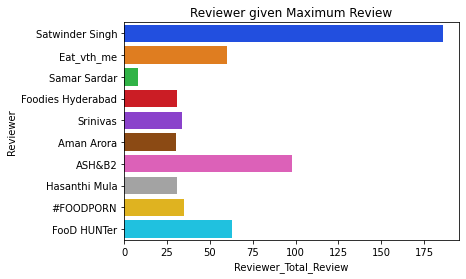

In [70]:
# Chart - 8 visualization code for most review
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Total_Review',
            y = 'Reviewer', palette='bright')
plt.title('Reviewer given Maximum Review')
plt.show()

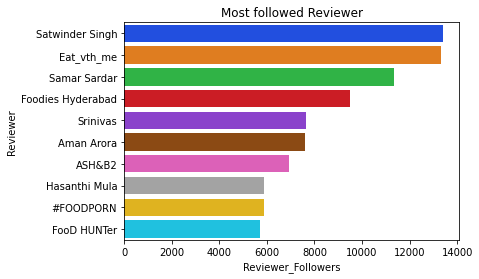

In [71]:
# visualization code for most review follower
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Followers', 
            y = 'Reviewer',palette='bright')
plt.title('Most followed Reviewer')
plt.show()

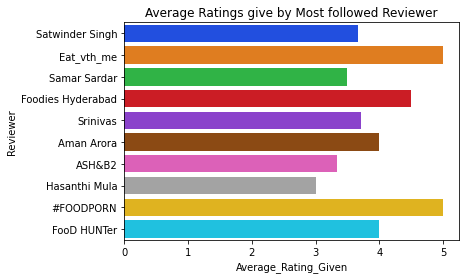

In [72]:
# visualization code for average rating given by most followed reviewer
sns.barplot(data = most_followed_reviewer[:10], x = 'Average_Rating_Given', 
            y = 'Reviewer',palette='bright')
plt.title('Average Ratings give by Most followed Reviewer')
plt.show()

##### 1. Why did you pick the specific chart?

Barplot helps in understanding the frequency of rating, follower and total reviews with respect to reviewer. Plotting total review, average reviewer rating, and total follower allows to see the correlation between these variables and how they relate to one another for each reviewer. It can also give insight on how reviewers with more followers tend to get more reviews, how their ratings tend to be, etc.

##### 2. What is/are the insight(s) found from the chart?

Satwinder singh is the most popular critic who has maximum number of follower and on an average he give 3.5 rating.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This information can be used to make strategic decisions about which reviewers to focus on promoting and expanding. For example, if a certain reviewer has a high average rating and a large number of followers, Zomato could focus on promoting their reviews to customers.

It's important to note that this chart does not provide all the information about the business, and can not be the only decision making factor. However it can help on promotions food based on reviews.

#### Chart - 9

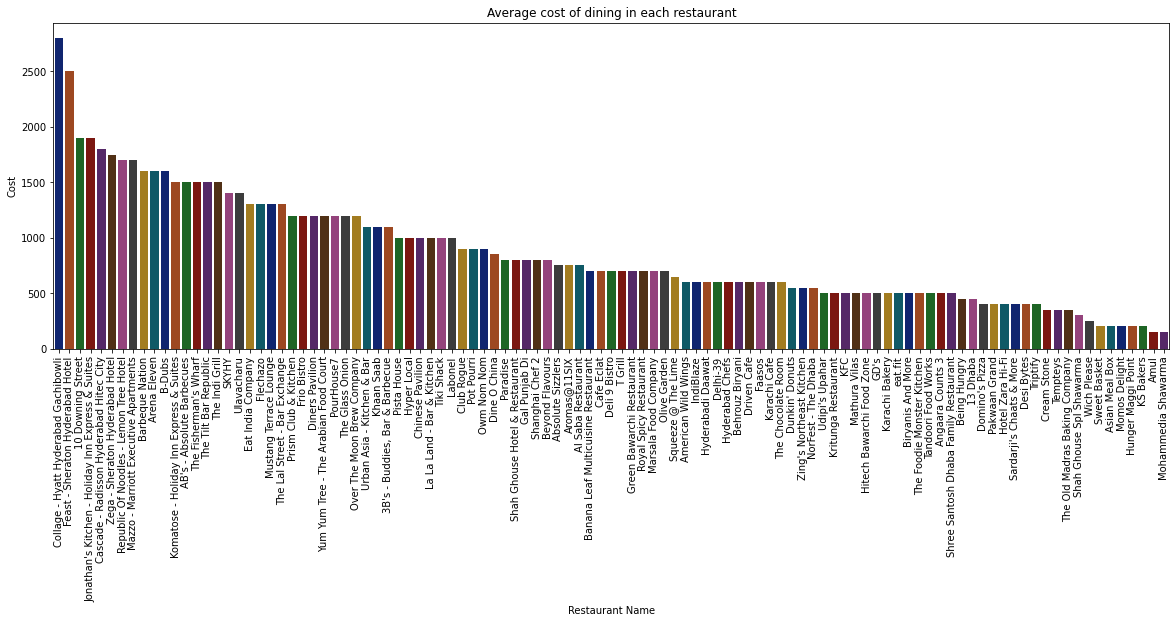

In [73]:
# Chart - 9 visualization code
# average cost of each restaurant
avg_cost_vs_rest= hotel.groupby(['Restaurant'])['Cost'].mean().sort_values(ascending=False).reset_index()
avg_cost_vs_rest.sort_values(by = 'Cost',ascending = False,inplace = True)

# plotting bar chart for average cost in each restaurant
fig = plt.figure(figsize=[20,6])
sns.barplot(data=avg_cost_vs_rest, x='Restaurant', y= 'Cost',palette = 'dark')
plt.title("Average cost of dining in each restaurant")
plt.xlabel('Restaurant Name')
plt.xticks(rotation=90)
plt.ylabel('Cost')
plt.show()
     

##### 1. Why did you pick the specific chart?

We have chosen Bar chart to visualize the count of restaurants serving a particular cuisine

##### 2. What is/are the insight(s) found from the chart?

*   North Indian is served in the highest number of restaurants in Hyderabad followed by Chinese and Continental.

*   Healthy Food, Labanese and Malaysian is served in least number of restaurants.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Cusines served by a few restaurants have clearly less demand in the market, so if the stakeholders will adopt some marketing strategy to increase the visibility of these cuisines, along with providing these cuisines at discounted rates, it may prove to be beneficial to the business.

#### Chart - 10

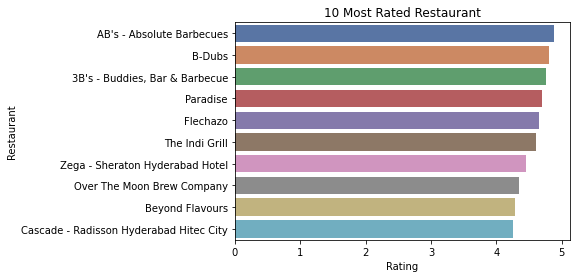

In [74]:
# Chart - 10 visualization code
#Will check best restaurants in terms of rating
top_restaurants= review.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False).reset_index()
sns.barplot(x='Rating', y='Restaurant', data=top_restaurants.sort_values(ascending=False, by='Rating')[:10],palette ='deep' )
plt.title('10 Most Rated Restaurant')

plt.show()

##### 1. Why did you pick the specific chart?

We picked the column chart to visualize the top 10 highest rated restaurants in the market.

##### 2. What is/are the insight(s) found from the chart?

AB - Absolute Barbique is the highest rated restaurant, other restaurant in the list has also similar ratings which is more than 4

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the chart above restaurant owners can assess the quality standards that these restaurants serves and based on that other restaurant can replicate the similar quality srandards and hence they can improve their business.

#### Chart - 11

In [75]:
#grounping reviewer list by count
reviewer_list = review.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)
top_reviewers = reviewer_list[:15]
top_reviewers.head()

,Reviewer,Review_Count
3859,Parijat Ray,13
656,Ankita,13
2655,Kiran,12
7014,Vedant Killa,11
2314,Jay Mehta,11


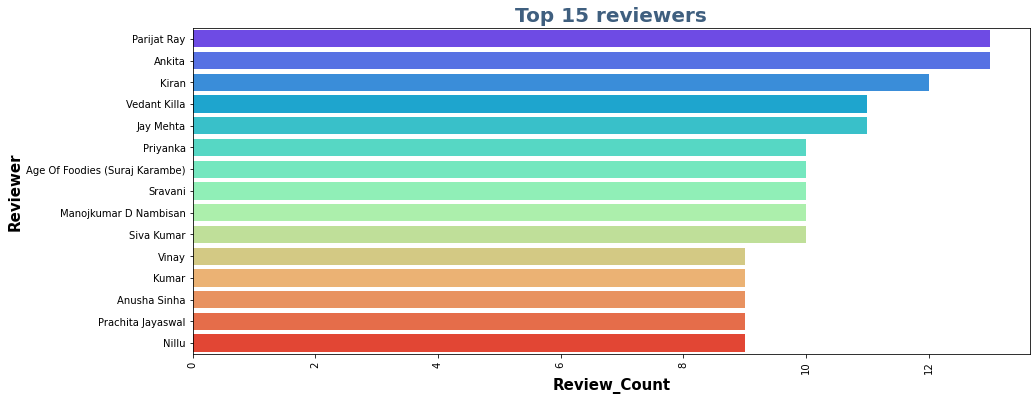

In [76]:
# Chart - 11 visualization code
# top reviewers who have more reviews
plt.figure(figsize=(15,6))
x = top_reviewers['Review_Count']
y = top_reviewers['Reviewer']
plt.title("Top 15 reviewers",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("No. of Reviews",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rainbow')
plt.show()

#### Chart - 12  **Correlation Heatmap**

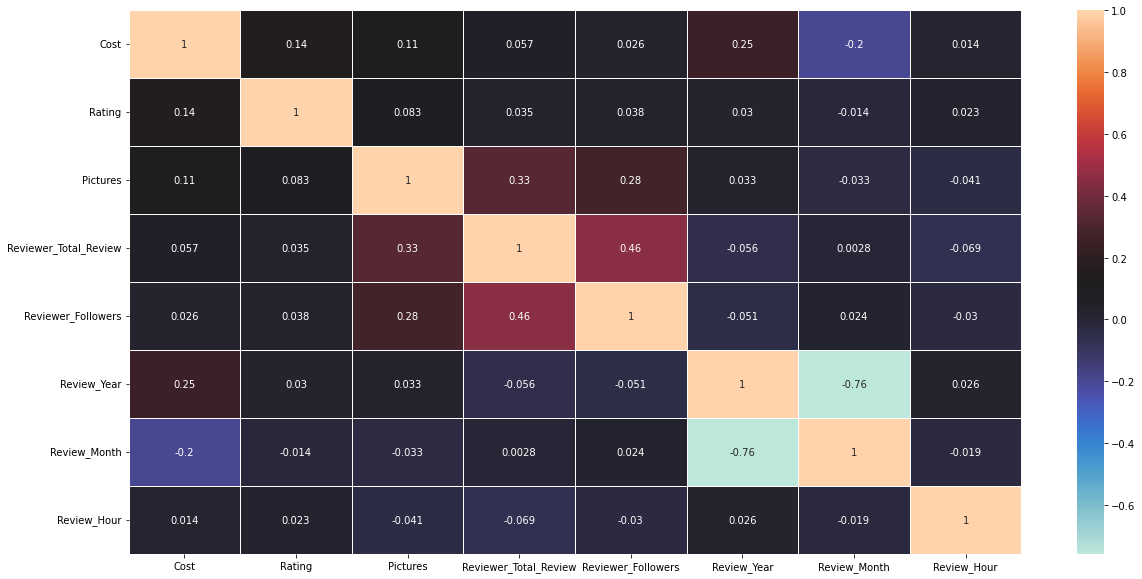

In [77]:
# Correlation Heatmap visualization code
# checking heatmap/correlation matrix to see the how the colums are correlated with each other
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(merged.corr(),ax = ax, annot=True, cmap = 'icefire', linewidths = 1)

plt.show()

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

From the above correlation heatmap, it can be depicted that few features are correlated, like reviewer total review is related to reviewer follower and again reviewer total review is related to pictures.

Rest all correlation can be depicted from the above chart

#### Chart - 13 - **Pair Plot** 

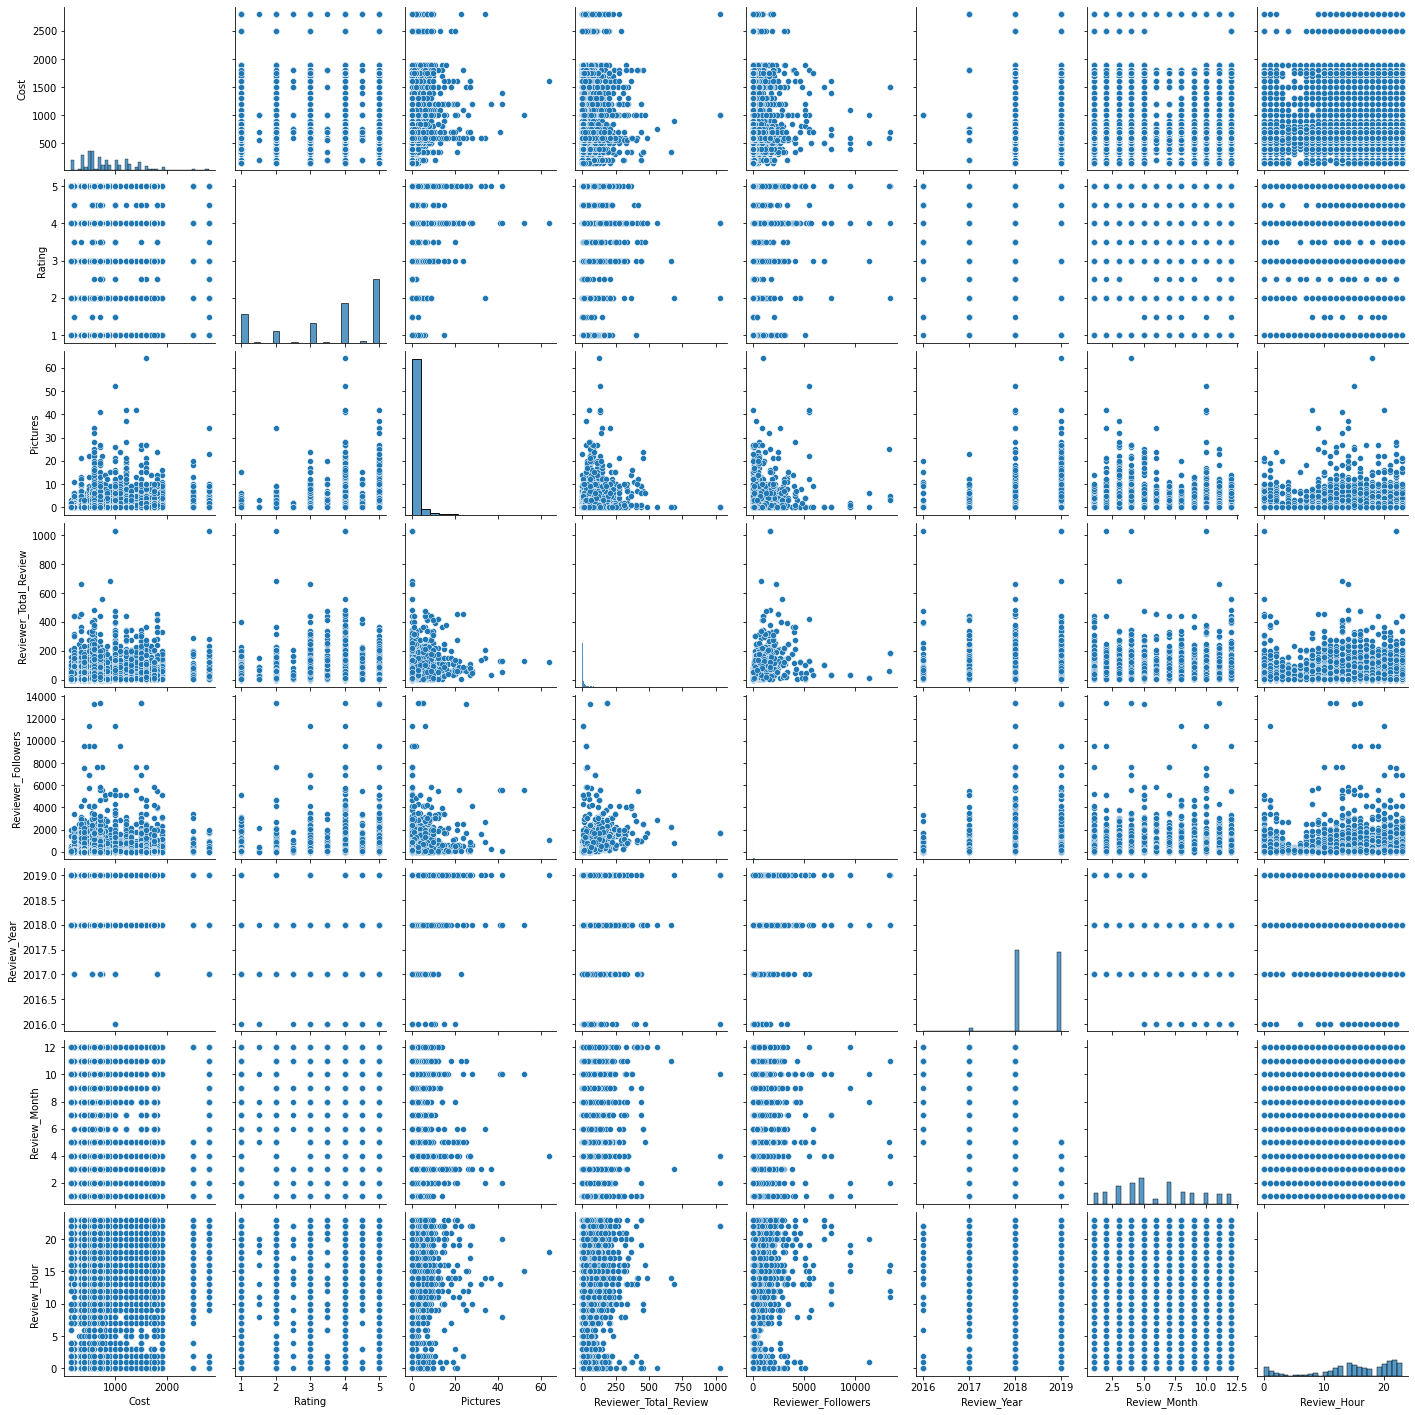

In [78]:
# Pair Plot visualization code
sns.pairplot(merged);

##### 1. Why did you pick the specific chart?

Pair plots are used to determine the best set of features to explain a relationship between two variables or to form the most distinct clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

As a result, I used a pair plot to examine the data patterns and relationships between the features. It's the same as the correlation map, but with a graphical representation.

##### 2. What is/are the insight(s) found from the chart?

There is no significant correlation between the given features in the merged dataframe, as can be seen.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

*   The price of a restaurant is closely linked to the rating it receives.
*   A better rating will be given to restaurants by reviewers who have more followers.
*   Restaurants that offer a wider variety of cuisines will have a higher rating.




### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*   **Null hypothesis:** There is no correlation between a restaurant's price and its rating . (H0: 𝛽1 = 0)
*   **Alternative hypothesis:** There is a positive relationship between the cost of a restaurant and the rating it receives. (H1: 𝛽1 > 0)
*   **Test :** Simple Linear Regression Analysis






#### 2. Perform an appropriate statistical test.

In [79]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf


# fit the linear model
model = smf.ols(formula='Rating ~ Cost', data= merged).fit()

# Check p-value of coefficient
p_value = model.pvalues[1]
if p_value < 0.05:
    print("Reject Null Hypothesis - There is no relationship between the cost of\
 restaurant and the rating it receives.")
else:
    print("Fail to reject Null Hypothesis - There is a positive relationship \
 between the cost of a restaurant and the rating it receives.")

Reject Null Hypothesis - There is no relationship between the cost of restaurant and the rating it receives.


##### Which statistical test have you done to obtain P-Value?

In order to determine whether there is a correlation between a restaurant's price and its review, I used a linear regression test.

##### Why did you choose the specific statistical test?

I choose this test because it is a widely used and simple technique for examining the correlation between two continuous variables. To do this, a linear model would need to be fitted with the rating acting as the dependent variable and the cost acting as the independent variable. The existence of a statistically significant association between the two variables can then be assessed using the p-value of the coefficient for the cost variable.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*   **Null hypothesis:** The number of followers a reviewer has has no effect on the rating of a restaurant. (H0: 𝛽1 = 0)
*   **Alternative hypothesis:** Alternative Hypothesis: The number of followers a reviewer has has a positive effect on the rating of a restaurant. (H1: 𝛽1 > 0)
*   **Test :** Simple Linear Regression test



#### 2. Perform an appropriate statistical test.

In [80]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf


# fit the linear model
model = smf.ols(formula='Rating ~ Reviewer_Followers', data = merged).fit()

# print the summary of the model
# print(model.summary())

# extract p-value of coefficient for Reviewer_Followers
p_value = model.pvalues[1]

if p_value < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

For the second hypothesis, I have used Simple Linear Regression Test.

##### Why did you choose the specific statistical test?

I picked this test because it is an easy way to determine whether two continuous variables are related. It allows us to gauge the magnitude and direction of the link between the independent variable (Reviewer Followers) and the dependent variable (Rating) by assuming that there is a linear relationship between them. By examining the p-value of the coefficient of the independent variable, we can also test the null hypothesis that there is no association between the two variables.

### Hypothetical Statement - 3

Restaurants with a wider choice of cuisines will receive higher ratings.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*   **Null hypothesis:** The variety of cuisines offered by a restaurant has no effect on its rating. (H0: 𝛽3 = 0)
*   **Alternative hypothesis:** The variety of cuisines offered by a restaurant has a positive effect on its rating. (H1: 𝛽3 > 0)
*   **Test :** Chi-Squared Test.

#### 2. Perform an appropriate statistical test.

In [81]:
# Perform Statistical Test to obtain P-Value
pd.crosstab(merged['Cuisines'], merged['Rating'])[:1]

Rating,1.00,1.50,2.00,2.50,3.00,3.50,4.00,4.50,5.00
Cuisines,,,,,,,,,
American,1,0,1,0,2,0,8,0,88


In [82]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# create a contingency table
ct = pd.crosstab(merged['Cuisines'], merged['Rating'])

# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

# Check p-value
if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

In order to evaluate the third hypothesis, I used the chi-squared test for independence to check at the relationship between a restaurant's rating and the range of cuisines it offers.

##### Why did you choose the specific statistical test?

This test appeals to me since it may be used to compare the correlation between two categorical variables. To do this, make a contingency table with the columns being the restaurant's rating and the rows being the number of restaurants that serve each cuisine.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

### **Treating Duplicates**

Since all the duplicated data has NaN values, hence dropping the entire values as it will not help and will create unnecessary noise.

In [83]:
# Handling Missing Values & Missing Value Imputation
#deleting duplicate value from review dataset
review = review.drop_duplicates()

In [84]:
#final check after dropping duplicates
print(f"Anymore duplicate left ? {review.duplicated().value_counts()}, unique values with {len(review[review.duplicated()])} duplication")

Anymore duplicate left ? False    9964
dtype: int64, unique values with 0 duplication


### **Treating Missing Values**
####**Restaurant Dataset**

In [85]:
# Handling Missing Values & Missing Value Imputation
hotel.isnull().sum()

Restaurant      0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [86]:
#checking the null value in timing
hotel[hotel['Timings'].isnull()]

,Restaurant,Links,Cost,Collections,Cuisines,Timings
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,NaN,"Andhra, South Indian, North Indian",NaN


In [87]:
#filling null value in timings column
hotel.Timings.fillna(hotel.Timings.mode()[0], inplace = True)

In [88]:
#checking null values in Collections
missing_percentage = ((hotel['Collections'].isnull().sum())/(len(hotel['Collections'])))*100
print(f'Percentage of missing value in Collections is {round(missing_percentage, 2)}%')

Percentage of missing value in Collections is 51.43%


In [89]:
#dropping collection column since has more than 50% of null values
hotel.drop('Collections', axis = 1, inplace = True)

In [90]:
#final checking of missing value
hotel.isnull().sum()

Restaurant    0
Links         0
Cost          0
Cuisines      0
Timings       0
dtype: int64

#### **Review Dataset**

In [91]:
#review missing value
review.isnull().sum()

Restaurant                  0
Reviewer                    2
Review                      9
Rating                      2
Metadata                    2
Time                        2
Pictures                    0
Reviewer_Total_Review       3
Reviewer_Followers       1581
Review_Year                 2
Review_Month                2
Review_Hour                 2
dtype: int64

In [92]:
#checking null reviewer
review[review['Reviewer'].isnull()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN
9085,Arena Eleven,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN


In [93]:
#checking null Reviewer_Total_Review
review[review['Reviewer_Total_Review'].isnull()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour
7601,4.00,4.00,4.00,4.00,4.00,1970-01-01 00:00:00.000000004,4,NaN,NaN,1970.00,1.00,0.00
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN
9085,Arena Eleven,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN


In [94]:
# dropping null values in reviewer and Reviewer_Total_Review column as all values are null for those column
review = review.dropna(subset=['Reviewer','Reviewer_Total_Review'])

In [95]:
#again checking the remaining values
null_counts = [(x, a) for x, a in review.isnull().sum().items() if a > 0]

# Print the columns with null values
null_counts

[('Review', 7), ('Reviewer_Followers', 1578)]

In [96]:
#filling null values in review and reviewer follower column
review = review.fillna({"Review": "No Review", "Reviewer_Followers": 0})

In [97]:
# final checking null values
review.isnull().sum()

Restaurant               0
Reviewer                 0
Review                   0
Rating                   0
Metadata                 0
Time                     0
Pictures                 0
Reviewer_Total_Review    0
Reviewer_Followers       0
Review_Year              0
Review_Month             0
Review_Hour              0
dtype: int64

In [98]:
#merging both dataset
merged = hotel.merge(review, on = 'Restaurant')
merged.shape

(9961, 16)

### **What all missing value imputation techniques have you used and why did you use those techniques?**

I started treating missing values by first removing the duplicate data where all other values were NaN or null values except had restaurant name, so instead of replacing each null value I removed it as it was only 36 duplicate data which had no unique identity.

Dataset that contains details about hotel, had 1 null value in timing feature and more than 50% null value in collection feature. In order to treat with those I first replaced the null value for timing with mode since there was only one null and mode is robust to outliers plus that hotel name was one unique feature which had all other feature except timing and collection so it was better to preserve that data. Since there was more than 50% null values in collection feature, I removed the entire column because columns with a high percentage of null values are likely to have a lot of missing data, which can make it difficult to accurately analyze or make predictions based on the data.

In the dataset tha has details of reviewer had Reviewer - 2, Review - 9, Rating - 2, Metadata - 2, Time - 2, Reviewer_Total_Review- 3, Reviewer_Followers - 1581, Review_Year - 2, Review_Month - 2, Review_Hour - 2. On analysing I found that feature like reviewer and reviewer total review had all null values, therefore I removed those two columns which made null values in other feature to zero except in review and reviewer followers columns. Since review was textual data, I changed those 7 null values to 'no review' and reviewer followers to 0 as follower is the meta data for reviewer and it can be 0.

And thus all the null values were treated, at the end I then again merged both the dataset hotel and review dataset.

### 2. Handling Outliers

### Detecting Anamoly

In [99]:
#Anamoly detection 
from sklearn.ensemble import IsolationForest
#checking for normal distribution 
print("Skewness - Cost: %f" % merged['Cost'].skew())
print("Kurtosis - Cost: %f" % merged['Cost'].kurt())
print("Skewness - Reviewer_Followers: %f" % merged['Reviewer_Followers'].skew())
print("Kurtosis - Reviewer_Followers: %f" % merged['Reviewer_Followers'].kurt())

Skewness - Cost: 1.153637
Kurtosis - Cost: 1.571590
Skewness - Reviewer_Followers: 10.092703
Kurtosis - Reviewer_Followers: 151.312960


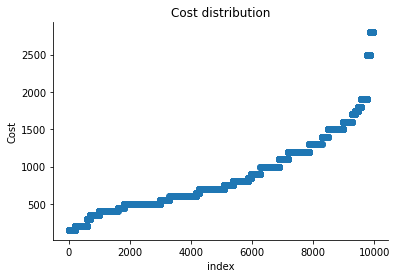

In [100]:
#plotting graph for cost
plt.scatter(range(merged.shape[0]), np.sort(merged['Cost'].values))
plt.xlabel('index')
plt.ylabel('Cost')
plt.title("Cost distribution")
sns.despine()

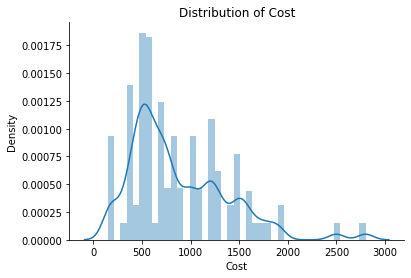

In [101]:
#distribution of cost
sns.distplot(merged['Cost'])
plt.title("Distribution of Cost")
sns.despine()

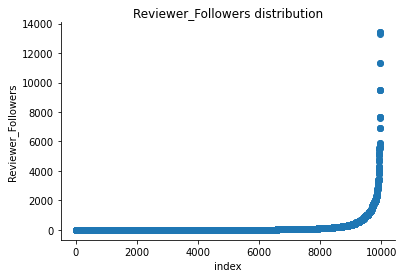

In [102]:
#plot for reviewer follower
plt.scatter(range(merged.shape[0]), np.sort(merged['Reviewer_Followers'].values))
plt.xlabel('index')
plt.ylabel('Reviewer_Followers')
plt.title("Reviewer_Followers distribution")
sns.despine()

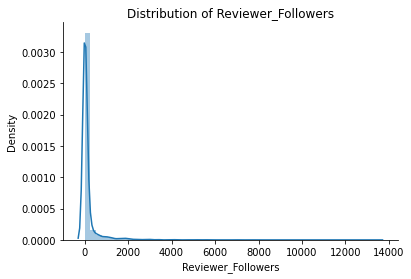

In [103]:
#distribution of Reviewer_Followers
sns.distplot(merged['Reviewer_Followers'])
plt.title("Distribution of Reviewer_Followers")
sns.despine()

In [104]:
#isolation forest for anamoly detection on cost
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged['Cost'].values.reshape(-1, 1))
merged['anomaly_score_univariate_Cost'] = isolation_forest.decision_function(merged['Cost'].values.reshape(-1, 1))
merged['outlier_univariate_Cost'] = isolation_forest.predict(merged['Cost'].values.reshape(-1, 1))

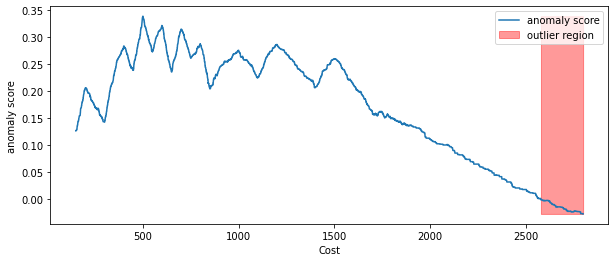

In [105]:
#chart to visualize outliers
xx = np.linspace(merged['Cost'].min(), merged['Cost'].max(), len(merged)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Cost')
plt.show();

In [106]:
#isolation forest for anamoly detection of reviewer follower
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged['Reviewer_Followers'].values.reshape(-1, 1))
merged['anomaly_score_univariate_follower'] = isolation_forest.decision_function(
    merged['Reviewer_Followers'].values.reshape(-1, 1))
merged['outlier_univariate_follower'] = isolation_forest.predict(
    merged['Reviewer_Followers'].values.reshape(-1, 1))

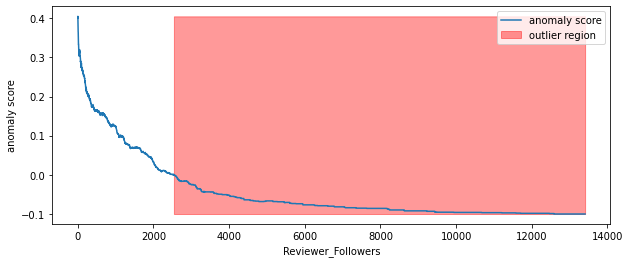

In [107]:
#chat to visualize outliers in reviwer follower column
xx = np.linspace(merged['Reviewer_Followers'].min(), merged['Reviewer_Followers'].max(), len(merged)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Reviewer_Followers')
plt.show();

### **Treating Outlier**

In [108]:
# Handling Outliers & Outlier treatments
# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_feature=[]
non_symmetric_feature=[]
for i in merged.describe().columns:
  if abs(merged[i].mean()-merged[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['anomaly_score_univariate_Cost', 'outlier_univariate_Cost', 'anomaly_score_univariate_follower', 'outlier_univariate_follower']
Skew Symmetric Distributed Features : - ['Cost', 'Rating', 'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers', 'Review_Year', 'Review_Month', 'Review_Hour']


In [109]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)- 1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+ 1.5*IQR
  # print(f'upper : {upper_bridge} lower : {lower_bridge}')
  return upper_bridge,lower_bridge

In [110]:
# Restricting the data to lower and upper boundary for cost in hotel dataset
#lower limit capping
hotel.loc[hotel['Cost']<= outlier_treatment_skew(df=hotel,
  feature='Cost')[1], 'Cost']=outlier_treatment_skew(df=hotel,feature='Cost')[1]

#upper limit capping
hotel.loc[hotel['Cost']>= outlier_treatment_skew(df=hotel,
  feature='Cost')[0], 'Cost']=outlier_treatment_skew(df=hotel,feature='Cost')[0]

In [111]:
# Restricting the data to lower and upper boundary for Reviewer followers in review dataset
#lower limit capping
review.loc[review['Reviewer_Followers']<= outlier_treatment_skew(df=review,
  feature='Reviewer_Followers')[1], 'Reviewer_Followers']=outlier_treatment_skew(
      df=review,feature='Reviewer_Followers')[1]

#upper limit capping
review.loc[review['Reviewer_Followers']>= outlier_treatment_skew(df=review,
  feature='Reviewer_Followers')[0], 'Reviewer_Followers']=outlier_treatment_skew(
      df=review,feature='Reviewer_Followers')[0]

In [112]:
#dropping the columns created while outliers treatment
merged.drop(columns =['anomaly_score_univariate_Cost','outlier_univariate_Cost',
  'anomaly_score_univariate_follower','outlier_univariate_follower'], inplace = True)

### **What all outlier treatment techniques have you used and why did you use those techniques?**

Since cost and reviewer follower feature or column show positive skewed distribution and using isolation forest found they have outliers, hence using the capping technique instead of removing the outliers, capped outliers with the highest and lowest limit using IQR method.



### 3. Categorical Encoding

In [113]:
# Encode your categorical columns

#categorial encoding using pd.getdummies
#new df with important categories
cluster_dummy = hotel[['Restaurant','Cuisines']]
#spliting cuisines as they are separted with comma and converting into list
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')
#using explode converting list to unique individual items
cluster_dummy = cluster_dummy.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].apply(lambda x: x.strip())
#using get dummies to get dummies for cuisines
cluster_dummy = pd.get_dummies(cluster_dummy, columns=["Cuisines"], prefix=["Cuisines"])

#checking if the values are correct
# cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].eq(1)[:5].T
cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].idxmax(1)[:6]

#replacing cuisines_ from columns name - for better understanding run seperatly

# cluster_dummy.columns = cluster_dummy.columns.str.replace(" ","")
cluster_dummy.columns = cluster_dummy.columns.str.replace("Cuisines_","")
# cluster_dummy = cluster_dummy.groupby(cluster_dummy.columns, axis=1).sum()

#grouping each restaurant as explode created unnecessary rows
cluster_dummy = cluster_dummy.groupby("Restaurant").sum().reset_index()



In [114]:
#total cuisine count 
hotel['Total_Cuisine_Count'] = hotel['Cuisines'].apply(lambda x : len(x.split(',')))

In [115]:
#adding average rating - will remove 5 unrated restaurant from 105 restaurant
avg_hotel_rating.rename(columns = {'Rating':'Average_Rating'}, inplace =True)
hotel = hotel.merge(avg_hotel_rating[['Average_Rating','Restaurant']], on = 'Restaurant')
hotel.head(5)

,Restaurant,Links,Cost,Cuisines,Timings,Total_Cuisine_Count,Average_Rating
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,4.28
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"Biryani, North Indian, Chinese",11 AM to 11 PM,3,4.70
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",4,4.66
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,5,3.21
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",5,4.34


In [116]:
#adding cost column to the new dataset 
cluster_dummy = hotel[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count'
                      ]].merge(cluster_dummy, on = 'Restaurant')

In [117]:
cluster_dummy.shape

(100, 48)

#### **Alternate Code**

In [118]:
#creating data frame for categorial encoding
cluster_df = hotel[['Restaurant','Cuisines','Cost','Average_Rating','Total_Cuisine_Count']]

In [119]:
#creating new dataframe for clustering 
cluster_df = pd.concat([cluster_df,pd.DataFrame(columns=list(cuisine_dict.keys()))])

In [120]:
#creating categorial feature for cuisine
#iterate over every row in the dataframe
for i, row in cluster_df.iterrows():
  # iterate over the new columns 
  for column in list(cluster_df.columns):
      if column not in ['Restaurant','Cost','Cuisines','Average_Rating','Total_Cuisine_Count']:
        # checking if the column is in the list of cuisines available for that row
        if column in row['Cuisines']:
          #assign it as 1 else 0
          cluster_df.loc[i,column] = 1
        else:
          cluster_df.loc[i,column] = 0

In [121]:
#result from encoding
cluster_df.head(2).T

,0,1
Restaurant,Beyond Flavours,Paradise
Cuisines,"Chinese, Continental, Kebab, European, South I...","Biryani, North Indian, Chinese"
Cost,800.00,800.00
Average_Rating,4.28,4.70
Total_Cuisine_Count,6.00,3.00
Chinese,1,1
Continental,1,0
Kebab,1,0
European,1,0
South Indian,1,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used one hot encoding on the cuisine category and based on the cuisine if present i gave value to 1 and if absent gave value of 0. Benefit of using one hot encoding:

* Handling categorical variables with no ordinal relationship:

    Because one-hot encoding does not assume any ordinal relationship between the categories, it is appropriate for categorical features with no natural ordering.

* Handling categorical variables with many unique values:

    One-hot encoding can handle categorical features with a high cardinality, which can be useful when there are many unique categories.

* Handling categorical variables with multiple levels:

    Categorical features with multiple levels, such as "state" and "city," can be handled by one-hot encoding. This is useful when there are numerous unique level combinations.

* Handling categorical variables with missing values:

    One-hot encoding can handle missing values by creating a new category for them.

* Model interpretability:

    One-hot encoded features are easy to interpret as the encoded values are binary, thus making it easy to understand the relationship between the categorical feature and the target variable.

* Compatibility with many machine learning models:

    Most machine learning models, including linear and logistic regression, decision trees, and neural networks, can use one-shot encoded features.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [122]:
#creating new df for text processing of sentiment analysis
sentiment_df = review[['Reviewer','Restaurant','Rating','Review']]
#analysing two random sample
sentiment_df.sample(2)

,Reviewer,Restaurant,Rating,Review
9249,Dabo,Collage - Hyatt Hyderabad Gachibowli,4.00,Very nice place with serene ambiance. Staff is...
2357,Sahithi Sahi330,Amul,5.00,good


In [123]:
#setting index
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index

In [124]:
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
4273,4273,Ahmedconstruction2017,Karachi Cafe,5.00,"An amazing cafe by karachi bakers, each and ev..."
9675,9675,Epicure,Zega - Sheraton Hyderabad Hotel,3.00,Was waiting for longtime to be @Zega with the ...


In [125]:
# Expand Contraction
import contractions
# applying fuction for contracting text
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(x))

#### 2. Lower Casing

In [126]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()

In [127]:
sentiment_df.head()

,index,Reviewer,Restaurant,Rating,Review
0,0,Rusha Chakraborty,Beyond Flavours,5.00,"the ambience was good, food was quite good . h..."
1,1,Anusha Tirumalaneedi,Beyond Flavours,5.00,ambience is too good for a pleasant evening. s...
2,2,Ashok Shekhawat,Beyond Flavours,5.00,a must try.. great food great ambience. thnx f...
3,3,Swapnil Sarkar,Beyond Flavours,5.00,soumen das and arun was a great guy. only beca...
4,4,Dileep,Beyond Flavours,5.00,food is good.we ordered kodi drumsticks and ba...


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
#import string

#def remove_punctuation(text, exclude=[]):
    #"""
    #A function for removing punctuation from text.
    
    #Parameters:
    #-----------
    #text: str
    #    The text to remove punctuation from.
        
    #exclude: list of str
    #    A list of punctuation characters to exclude from removal.
    
    #Returns:
    #--------
    #str:
     #   The text with punctuation removed, except for any excluded characters.
    #"""
    # Create a translation table with punctuation characters replaced by None
    #translator = str.maketrans('', '', string.punctuation)
    
    # Exclude any specified punctuation characters
    #for char in exclude:
    #    translator[ord(char)] = char
    
    # Remove the punctuation from the text
    #return text.translate(translator)


In [186]:
# Remove Punctuations
import string
def remove_punctuation(text):
  '''a function for removing punctuation'''

  # replacing the punctuations with no space,
  # which in effect deletes the punctuation marks
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation marks
  return text.translate(translator)

In [129]:
#remove punctuation using function created
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)
sentiment_df.sample(5)

,index,Reviewer,Restaurant,Rating,Review
7794,7794,JITENDRA SARDIWAL,Squeeze @ The Lime,5.00,food was awesome packing was also too good
5874,5874,Vittal Bvr,Tempteys,5.00,good bhehave
6042,6042,Surya.nandu.SN,PourHouse7,2.00,a decent place for party and a cozy climate to...
2645,2645,Prachita Jayaswal,Mustang Terrace Lounge,3.00,food drinks and music all is good what this pl...
2149,2149,Suraj Soni,Jonathan's Kitchen - Holiday Inn Express & Suites,2.00,writing this review for so called much hyped r...


#### 4. Removing URLs & Removing words and digits contain digits.

In [130]:
# Remove URLs & Remove words and digits contain digits
import re

# Remove links
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))

# Remove digits
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))

In [131]:
#function to extract location of the restaurant
def get_location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
hotel['Location'] = hotel['Links'].apply(get_location)
hotel.sample(2)

,Restaurant,Links,Cost,Cuisines,Timings,Total_Cuisine_Count,Average_Rating,Location
89,Mohammedia Shawarma,https://www.zomato.com/hyderabad/mohammedia-sh...,150,"Street Food, Arabian",1 PM to 1 AM,2,2.99,hyderabad
65,Komatose - Holiday Inn Express & Suites,https://www.zomato.com/hyderabad/komatose-holi...,1500,"North Indian, Chinese, Japanese, Sushi",1 PM to 11 PM,4,3.69,hyderabad


#### 5. Removing Stopwords & Removing White spaces

In [132]:
# Remove Stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')

In [133]:
#function to remove stopwords
def delete_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

In [134]:
#calling function to remove stopwords
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)

In [135]:
#calling function to remove stopwords
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)

In [136]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

In [137]:
#random sample 
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
5162,5162,Kanakesh,Hitech Bawarchi Food Zone,5.00,good
5339,5339,Muskan Bhansali,Diners Pavilion,4.00,ambience good family dinner warm mellow lights...


#### 6. Rephrase Text

In [138]:
# Rephrase Text
sentiment_df.sample(5)

,index,Reviewer,Restaurant,Rating,Review
4850,4850,Anish Kumar Barnwal,Udipi's Upahar,5.00,great taste quick deliverey
3798,3798,Kevin,Kritunga Restaurant,1.00,bad
5409,5409,Suman,Asian Meal Box,5.00,one best gobi manchurians world thank keep qua...
4003,4003,Arunraj R,Frio Bistro,1.00,multiple bad experiences food bad waiter impol...
5959,5959,Pammy Sagar,KS Bakers,4.50,bought christmas cake really great design impr...


#### 7. Tokenization

In [139]:
# Tokenization
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)

In [140]:
sentiment_df.sample(5)

,index,Reviewer,Restaurant,Rating,Review
2785,2785,The Burger Chef,"3B's - Buddies, Bar & Barbecue",5.00,"[good, time, place, mrsuraj, friendly, polite,..."
4016,4016,Ashritha Rao,Frio Bistro,1.00,"[wish, could, make, taste, chicken, nuggets, o..."
3393,3393,Såi Têjå,Club Rogue,5.00,"[absolute, fun, really, loved, ambience, atmos..."
7076,7076,Tejaswini Mandava,Urban Asia - Kitchen & Bar,4.00,"[went, lunch, buffet, let, us, us, recognize, ..."
2084,2084,Friendsrishabh3107,13 Dhaba,1.00,"[got, dal, chawal, instead, dal, makhni]"


#### 8. Text Normalization

In [141]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

#stemming using snowballstemmer
from nltk.stem import SnowballStemmer

# # Create a stemmer
stemmer = SnowballStemmer("english")

def stem_tokens(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# # Stem the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(stem_tokens)

In [142]:
sentiment_df.sample(5)

,index,Reviewer,Restaurant,Rating,Review
1184,1184,Saumya Ranjan,Barbeque Nation,4.00,"[hell, parti, land, colleagu, friend, barbecu,..."
378,378,Owais Khan,Shah Ghouse Hotel & Restaurant,5.00,"[one, best, restraunt, hyderabad, food, awesom..."
2256,2256,Charan Vusirikapally,B-Dubs,5.00,"[realli, awesom, experi, visit, bdub, wing, re..."
2345,2345,Saketh Ram,Amul,1.00,"[staff, ill, manner, respect, toward, custom, ..."
3244,3244,Meha Gupta,Marsala Food Company,1.00,"[visit, place, first, time, team, peopl, check..."


##### Which text normalization technique have you used and why?

I have used **Lemmatization** as a text normalization technique.

Lemmatization, like stemming, is the process of reducing words to their base or root form. However, lemmatization employs a dictionary-based approach and takes into account the context of the word to determine its base form, whereas stemming employs simple heuristics and does not take the context of the word into account. Lemmatization is a more accurate method of determining a word's root form because it considers both the context and the grammatical structure of the word.

I used lemmatization instead of stemming because it is a more accurate way of reducing words to their base form. Lemmatization considers the context of the word as well as its grammatical structure to determine its base form, which can help natural language processing models perform better. Lemmatization is frequently used in tasks where the meaning of the words is important, such as text classification and information retrieval.

#### 9. Part of speech tagging

In [ ]:
# POS Taging
#Here I am not performing POS tagging as it was taking longer time when training.

#### 10. Text Vectorization

##### **Tfidf**

In [143]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)
#creating independent variable for sentiment analysis
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)

#### **Bag of Words**

In [144]:
#Bag of Words
tokenized_text = []
for token in sentiment_df['Review']:
    tokenized_text.append(token)

#creating token dict
tokens_dict = gensim.corpora.Dictionary(tokenized_text)

#print token dict 
#tokens_dict.token2id

In [145]:
# Generate BoW features for each tokenized course using `doc2bow()`
texts_bow = [tokens_dict.doc2bow(text) for text in tokenized_text]

# Create an empty list for each column in our final dataframe, and loop through each document's BoW representation to extract the relevant information.
tokens = []
bow_values = []
doc_indices = []
doc_ids = []

for text_idx, text_bow in enumerate(texts_bow): # Loop through each document and its corresponding BoW representation
    for token_index, token_bow in text_bow: # Loop through each token and its corresponding frequency in the document
        token = tokens_dict.get(token_index) # Get the token from the dictionary based on its index
        tokens.append(token) # Add the token to the list
        bow_values.append(token_bow) # Add the frequency of the token in the document to the list
        doc_indices.append(text_idx) # Add the index of the document to the list
        doc_ids.append(sentiment_df["Restaurant"][text_idx]) # Add the document ID (restaurant name) to the list

# Combine all of our lists into a dictionary and then convert it into a pandas DataFrame for easy analysis.
bow_dict = {"doc_index": doc_indices,
            "doc_id": doc_ids,
            "token": tokens,
            "bow": bow_values,
            }
bows_df = pd.DataFrame(bow_dict)

# Display the first few rows of the resulting DataFrame.
bows_df.head()


,doc_index,doc_id,token,bow
0,0,Beyond Flavours,also,1
1,0,Beyond Flavours,ambienc,1
2,0,Beyond Flavours,brunch,1
3,0,Beyond Flavours,chill,1
4,0,Beyond Flavours,cost,1


##### Which text vectorization technique have you used and why?

Here I have used Tf-idf Vectorization technique.

TF-IDF (term frequency-inverse document frequency) is a technique that assigns a weight to each word in a document. It is calculated as the product of the term frequency (tf) and the inverse document frequency (idf).

The term frequency (tf) is the number of times a word appears in a document, while the inverse document frequency (idf) is a measure of how rare a word is across all documents in a collection. The intuition behind tf-idf is that words that appear frequently in a document but not in many documents across the collection are more informative and thus should be given more weight.

The mathematical formula for tf-idf is as follows:

tf-idf(t, d, D) = tf(t, d) * idf(t, D)

where t is a term (word), d is a document, D is a collection of documents, tf(t, d) is the term frequency of t in d, and idf(t, D) is the inverse document frequency of t in D.

The tf component of the weight assigns a value to a word based on how often it appears in the document, while the idf component assigns a value based on how rare the word is in the entire collection of documents. Tf-idf is commonly used in text classification and information retrieval tasks because it can help to down-weight the effect of common words and up-weight the effect of rare words which are more informative.

It also helps to reduce the dimensionality of the data and increases the weight of important words, thus providing more informative and robust feature set for the model to work on.

Text vectorization is the process of converting text data into numerical vectors that can be used as input for machine learning models.

There are several ways to vectorize text data, one of the most common methods is using Tf-idf Vectorization, other methods are bag-of-words (BoW - uses CountVectorizer), word2vec, or doc2vec model.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

#### **Restaurant**

In [146]:
# Manipulate Features to minimize feature correlation and create new features
hotel.shape

(100, 8)

In [147]:
#columns for dataset
hotel.columns

Index(['Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings',
       'Total_Cuisine_Count', 'Average_Rating', 'Location'],
      dtype='object')



*   Dropping column like link as from link location was extracted, dropping location as it does not have variability only had hyderabad as 99% values. Then dropping Cuisines column as cuisine from the feature are extracted as new feature.

In [148]:
#dropping columns
hotel = hotel.drop(columns = ['Links','Location'], axis = 1)

In [149]:
hotel.shape

(100, 6)

In [150]:
#creating new dataframe which will be used for clustering i.e dropping the unimportant column
#this dataset was used earlier while categorial encoding hence using it for clustering
cluster_df.shape

(100, 49)

In [151]:
#dropping cuisine and restaurant from cluster_dummy
cluster_df = cluster_df.drop(columns = ['Restaurant','Cuisines'], axis = 1)

In [152]:
cluster_df.sample(5)

,Cost,Average_Rating,Total_Cuisine_Count,Chinese,Continental,Kebab,European,South Indian,North Indian,Biryani,...,Spanish,Wraps,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Mithai,Malaysian
1,800.00,4.70,3.00,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
0,800.00,4.28,6.00,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
68,1500.00,3.85,3.00,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,1000.00,3.64,5.00,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
85,200.00,3.73,1.00,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### **Review**

In [153]:
#alternatively using other variable created earlier during categorial creation
cluster_dummy.shape

(100, 48)

In [154]:
#review data shape
review.shape

(9961, 12)

In [155]:
#review column
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers',
       'Review_Year', 'Review_Month', 'Review_Hour'],
      dtype='object')

* Since this dataset is used for sentiment analysis, therefore using only specific feature for sentiment analysis like Restaurant, Review and Ratings.

In [156]:
#creating new binary feature called sentiment based on rating which has 1 = positive and 0 = negative
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(
    lambda x: 1 if x >=sentiment_df['Rating'].mean() else 0)  #1 = positive # 0 = negative

In [157]:
#sentiment data frame
sentiment_df.sample(5)

,index,Reviewer,Restaurant,Rating,Review,Sentiment
901,901,Sheshank Kumar,Cream Stone,4.00,"[alway, love, swiggi, food, nutella, browni, f...",1
8844,8844,MAYANK SOOD,Domino's Pizza,3.00,"[deliveri, tast, good]",0
531,531,Monika Pandey,The Fisherman's Wharf,4.00,"[place, realli, good, n, relax, ambianc, love,...",1
6011,6011,Anjali Gupta,PourHouse7,1.00,"[went, quick, drinkssnack, catchup, zomato, go...",0
6041,6041,Pranjali Adhav,PourHouse7,5.00,"[one, peac, place, hangout, friend, open, terr...",1


#### 2. Feature Selection

In [158]:
hotel.columns

Index(['Restaurant', 'Cost', 'Cuisines', 'Timings', 'Total_Cuisine_Count',
       'Average_Rating'],
      dtype='object')

In [159]:
# Select your features wisely to avoid overfitting
#feature selcted for clustering 
cluster_df.columns

Index(['Cost', 'Average_Rating', 'Total_Cuisine_Count', 'Chinese',
       'Continental', 'Kebab', 'European', 'South Indian', 'North Indian',
       'Biryani', 'Asian', 'Mediterranean', 'Desserts', 'Seafood', 'Beverages',
       'Goan', 'Healthy Food', 'Lebanese', 'American', 'Ice Cream',
       'Street Food', 'Fast Food', 'BBQ', 'Italian', 'Finger Food', 'Burger',
       'Japanese', 'Salad', 'Sushi', 'Mexican', 'Mughlai', 'Andhra', 'Bakery',
       'Juices', 'Arabian', 'Hyderabadi', 'Cafe', 'Spanish', 'Wraps', 'Thai',
       'Indonesian', 'Modern Indian', 'Momos', 'Pizza', 'North Eastern',
       'Mithai', 'Malaysian'],
      dtype='object')

In [160]:
cluster_dummy.columns

Index(['Restaurant', 'Cost', 'Average_Rating', 'Total_Cuisine_Count',
       'American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages',
       'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental', 'Desserts',
       'European', 'Fast Food', 'Finger Food', 'Goan', 'Healthy Food',
       'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian', 'Japanese',
       'Juices', 'Kebab', 'Lebanese', 'Malaysian', 'Mediterranean', 'Mexican',
       'Mithai', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern',
       'North Indian', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish',
       'Street Food', 'Sushi', 'Thai', 'Wraps'],
      dtype='object')

In [161]:
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers',
       'Review_Year', 'Review_Month', 'Review_Hour'],
      dtype='object')

In [162]:
#feature selected for sentiment analysis
sentiment_df.columns

Index(['index', 'Reviewer', 'Restaurant', 'Rating', 'Review', 'Sentiment'], dtype='object')

##### What all feature selection methods have you used  and why?

I will be using PCA for feature selection, which will be useful for dimensional reduction again, so I'll do the necessary in the preceding step.

The goal of PCA is to identify the most important variables or features in the data that capture the most variation, and then project the data onto a lower-dimensional space while preserving as much of the variance as possible.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [163]:
# Transform Your data
# Getting symmetric and skew symmetric features from the cplumns
symmetric_feature=[]
non_symmetric_feature=[]
for i in cluster_df.describe().columns:
  if abs(cluster_df[i].mean()-cluster_df[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Average_Rating', 'Total_Cuisine_Count']
Skew Symmetric Distributed Features : - ['Cost']


In [164]:
#using log transformation to transform Cost as using capping tends to change median and mean
cluster_df['Cost'] = np.log1p(cluster_df['Cost'])
cluster_dummy['Cost'] = np.log1p(cluster_dummy['Cost'])

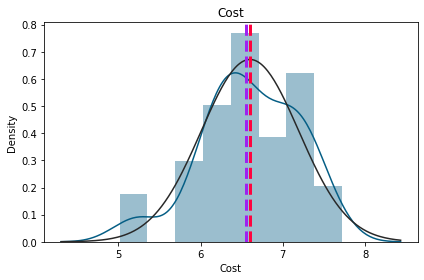

In [165]:
# Transform Your data
for i,col in enumerate(['Cost']) :
    sns.distplot(cluster_df[col], color = '#055E85', fit = norm);
    feature = cluster_df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    #plt.legend(bbox_to_anchor = (1.0, 1), loc = 'up')
    plt.title(f'{col.title()}');
    plt.tight_layout();

* Since I have applied capping method, it changes mean and median, hence trying to achieve normal distribution using log transformation which is a method for treating positive skewness.

Gaussian transformation generally used to convert data distribution into normal distribution.

### 6. Data Scaling

In [166]:
# Scaling your data
# Scaling your data
cluster_dummy.sample(5)

,Restaurant,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
12,Absolute Sizzlers,6.62,3.62,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,Hitech Bawarchi Food Zone,6.22,3.05,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
48,Udipi's Upahar,6.22,4.03,3,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
88,Domino's Pizza,5.99,3.09,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
23,Amul,5.02,3.94,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
#normalizing numerical columns
numerical_cols = ['Cost','Total_Cuisine_Count','Average_Rating']
scaler = StandardScaler()
scaler.fit(cluster_dummy[numerical_cols])
scaled_df = cluster_dummy.copy()
scaled_df[numerical_cols] = scaler.transform(cluster_dummy[numerical_cols])

##### Which method have you used to scale you data and why?

* Here I have used standard scaler as those numerical columns where normally distributed.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, dimensionality reduction techniques are required when the dataset contains 40 or more features. This is due to the fact that as the number of features increases, so does the computational cost of clustering algorithms. Furthermore, high dimensionality can result in the "curse of dimensionality," in which the data becomes sparse and clusters become more difficult to identify. Dimensionality reduction techniques such as PCA, t-SNE, or LLE can help reduce the number of features while retaining the important information in the data, making clustering and interpreting the results easier.

In [168]:
# DImensionality Reduction (If needed)
#applying pca
#setting restaurant feature as index as it still had categorial value
scaled_df.set_index(['Restaurant'],inplace=True)
features = scaled_df.columns
# features = features.drop('Restaurant')
# create an instance of PCA
pca = PCA()

# fit PCA on features
pca.fit(scaled_df[features])

PCA()

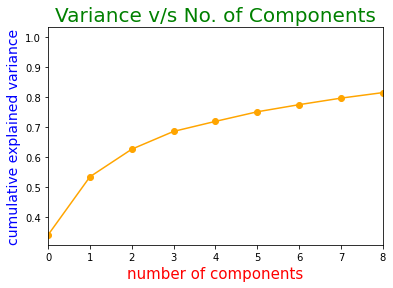

In [169]:
#explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'orange')
plt.xlabel('number of components',size = 15, color = 'red')
plt.ylabel('cumulative explained variance',size = 14, color = 'blue')
plt.title('Variance v/s No. of Components',size = 20, color = 'green')
plt.xlim([0, 8])
plt.show()

In [170]:
#using n_component as 3 
pca = PCA(n_components=3)

# fit PCA on features
pca.fit(scaled_df[features])

# explained variance ratio of each principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))

# transform data to principal component space
df_pca = pca.transform(scaled_df[features])

Explained variation per principal component: [0.34148554 0.1936559  0.0919578 ]
Cumulative variance explained by 3 principal components: 62.71%


In [171]:
#shape
print("original shape: ", scaled_df.shape)
print("transformed shape:", df_pca.shape)

original shape:  (100, 47)
transformed shape: (100, 3)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used PCA as a dimension reduction technique because PCA (Principal Component Analysis) is a widely used dimensionality reduction technique that can identify patterns in data that are responsible for the majority of variation. These patterns, known as principal components, are uncorrelated linear combinations of the original features. The first few principal components, which account for the majority of the variation in the data, can be used to effectively reduce the dimensionality of the data while retaining the majority of the important information.

Another benefit of PCA is that it is a linear technique, which means it can be used on data with a linear relationship between features. The results are also simple to interpret because the principal components can be thought of as new, uncorrelated features. PCA can also be used for data visualisation by projecting high-dimensional data into a 2D or 3D space for easy viewing.

When PCA is applied before k-means, it is used to reduce the dimensionality of the data by transforming the original feature space into a new feature space of uncorrelated principal components. The k-means algorithm is then applied to the transformed data, resulting in clusters that are defined in the new feature space. The advantage of this approach is that it can help to remove noise and correlated features from the data, which can make the clustering results more interpretable. However, it also means that the clusters may be harder to interpret in the original feature space.

PCA is used after k-means to visualise the clusters in a lower-dimensional space. When the k-means algorithm is applied to the original data, it produces clusters defined in the original feature space. PCA is then used to project the data into a lower-dimensional space, making it easier to visualise and interpret the clusters. The advantage of this approach is that the clusters in the original feature space can be easily interpreted. It may, however, be less effective at removing noise and correlated features from data.

### 8. Data Splitting

In [172]:
# Split your data to train and test. Choose Splitting ratio wisely.
# for sentiment analysis using sentiment_df dataframe
X = X_tfidf #from text vectorization
y = sentiment_df['Sentiment']

In [173]:
sentiment_df.shape

(9961, 6)

In [174]:
#spliting test train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# describes info about train and test set
print("No transactions X_train dataset: ", X_train.shape)
print("No transactions y_train dataset: ", y_train.shape)
print("No transactions X_test dataset: ", X_test.shape)
print("No transactions y_test dataset: ", y_test.shape)

No transactions X_train dataset:  (7968, 14702)
No transactions y_train dataset:  (7968,)
No transactions X_test dataset:  (1993, 14702)
No transactions y_test dataset:  (1993,)


##### What data splitting ratio have you used and why? 

I used an 80:20 split, which is one of the most common split ratios. Because there was only 9961 data points, I used more in the training set.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Using class imbalance ratio (CIR) to measure data imbalance. The CIR is calculated as the ratio of the number of observations in the majority class (Nm) to the number of observations in the minority class (Nm). The CIR can be expressed as: CIR = Nm / Ns, where Nm is the number of observations in the majority class and Ns is the number of observations in the minority class.

In [175]:
# Handling Imbalanced Dataset (If needed)
#getting the value count for target class
vc = sentiment_df.Sentiment.value_counts().reset_index().rename(columns = 
            {'index':'Sentiment','Sentiment':'Count'})

In [176]:
#defining majority and minority class value
majority_class = vc.Count[0]
minority_class = vc.Count[1]

In [177]:
#calculating cir value for checking class imbalance
CIR = majority_class / minority_class
CIR

1.701654461621915

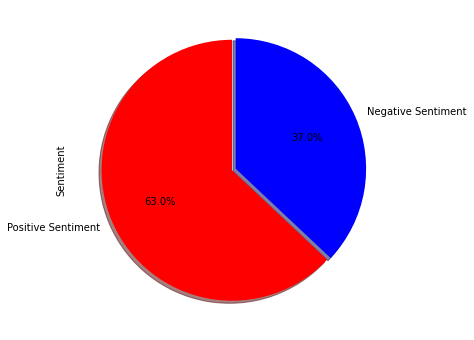

In [178]:
# Dependant Variable Column Visualization
sentiment_df['Sentiment'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Positive Sentiment','Negative Sentiment'],
                               colors=['red','blue'],
                               explode=[0.01,0.02]
                              )
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Yes, there is an imbalance in the dataset with a 60:40 ratio, where 60 represents the majority class and 40 represents the minority class. Even the CIR score indicates that the majority class is 1.73 times larger than the minority class. However, because it is considered a minor imbalance, no under or over sampling techniques are used, and no class imabalance treatment is required.

## ***7. ML Model Implementation***

### ML Model - 1 **Clustering**

#### **KMeans Clustering**

K-Means Clustering is an Unsupervised Learning algorithm.The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. The value of k should be predetermined in this algorithm.

It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

The k-means clustering algorithm mainly performs two tasks:

Determines the best value for K center points or centroids by an iterative process.

Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.

#### **ELBOW METHOD**



   > This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster.



#### **SILHOUETTE METHOD**



> The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).



In [180]:
# ML Model - 1 Implementation

#importing kmeans
from sklearn.cluster import KMeans

In [181]:
#Within Cluster Sum of Squared Errors(WCSS) for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(df_pca)
    wcss.append(km.inertia_)

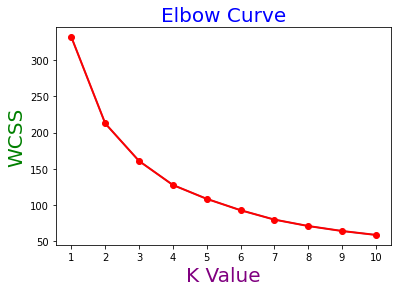

In [182]:
#elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value", size = 20, color = 'purple')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS", size = 20, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'blue')
plt.show()

Alternate Code For Silhouette Score

For n_clusters = 2 average silhouette_score is : 0.31357491715917435
For n_clusters = 3 average silhouette_score is : 0.2974211971806105
For n_clusters = 4 average silhouette_score is : 0.31274400128254354
For n_clusters = 5 average silhouette_score is : 0.30244427842780736
For n_clusters = 6 average silhouette_score is : 0.3167480002610183
For n_clusters = 7 average silhouette_score is : 0.30965474418889105
For n_clusters = 8 average silhouette_score is : 0.29778072472714795
For n_clusters = 9 average silhouette_score is : 0.29957199850588145


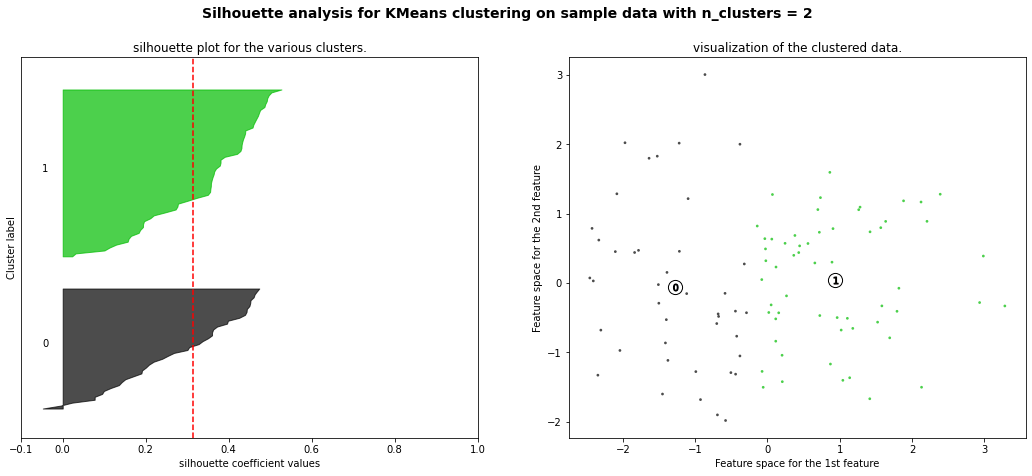

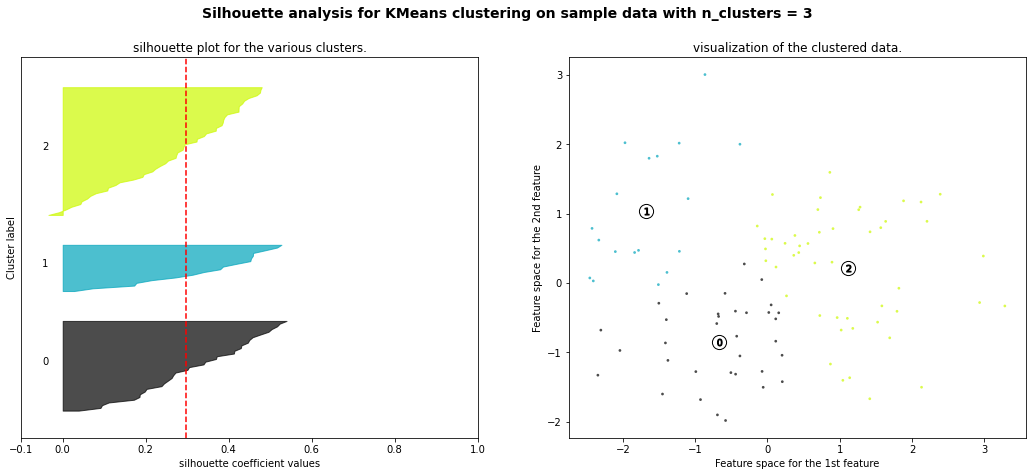

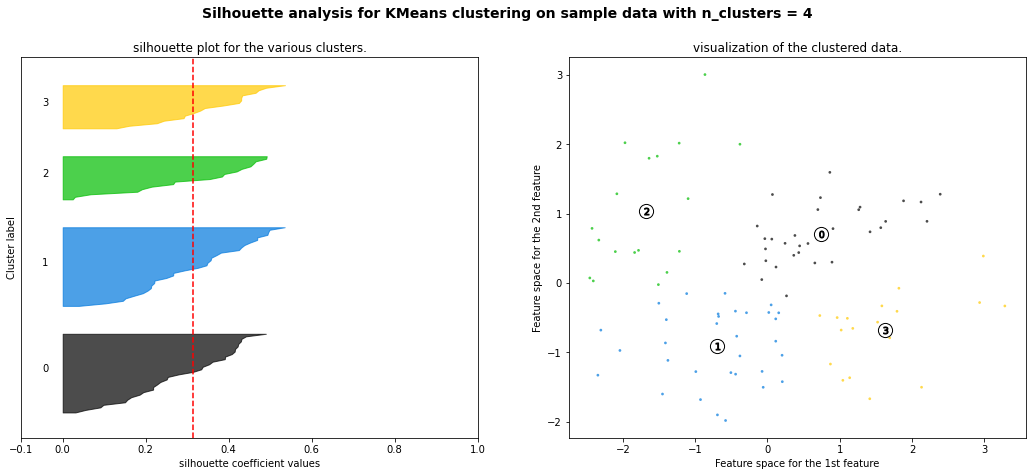

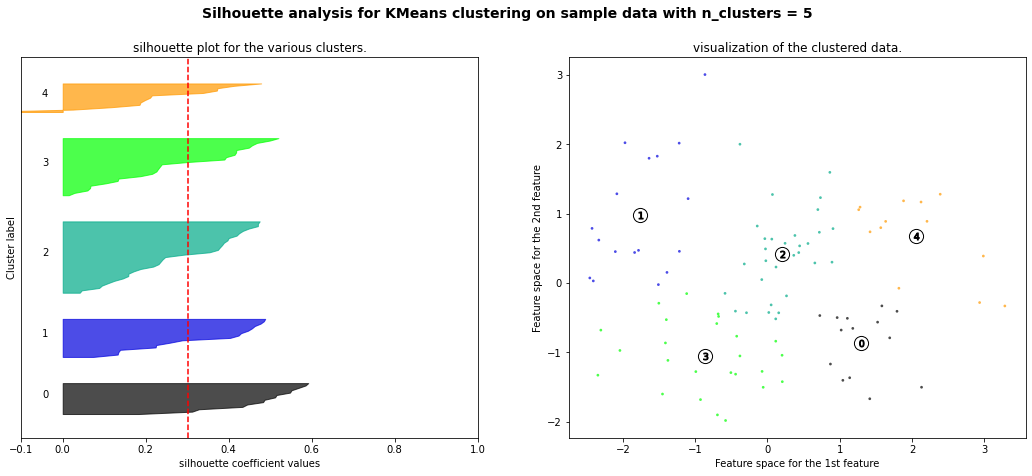

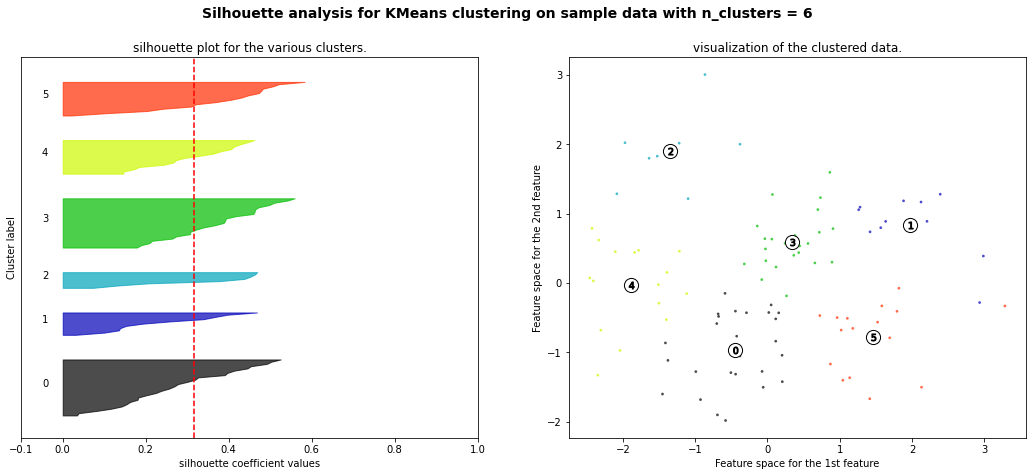

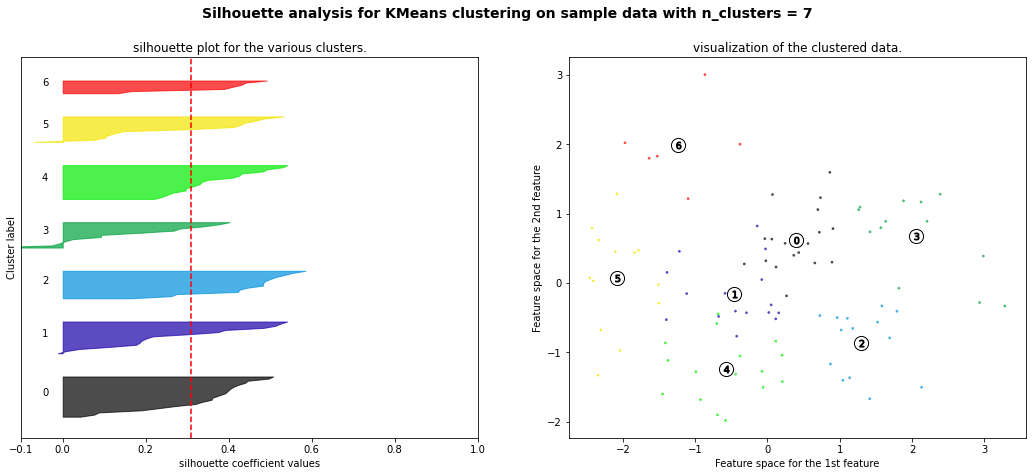

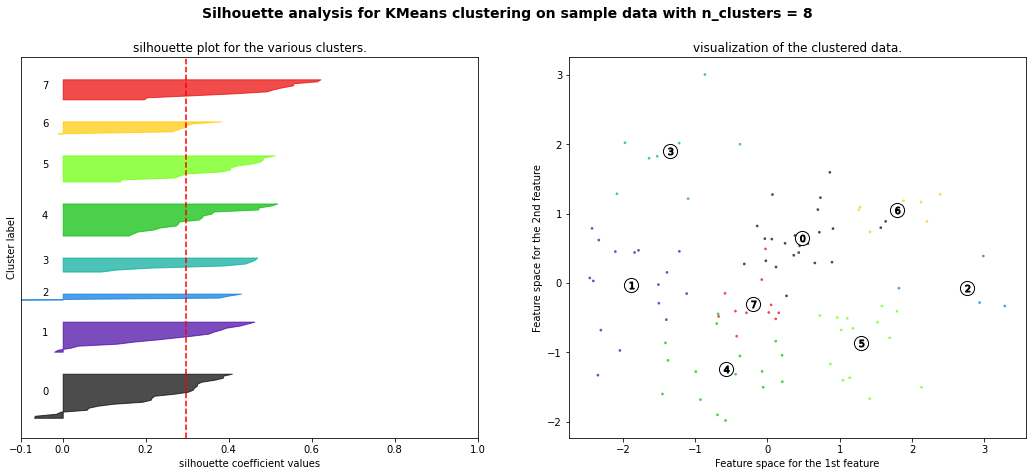

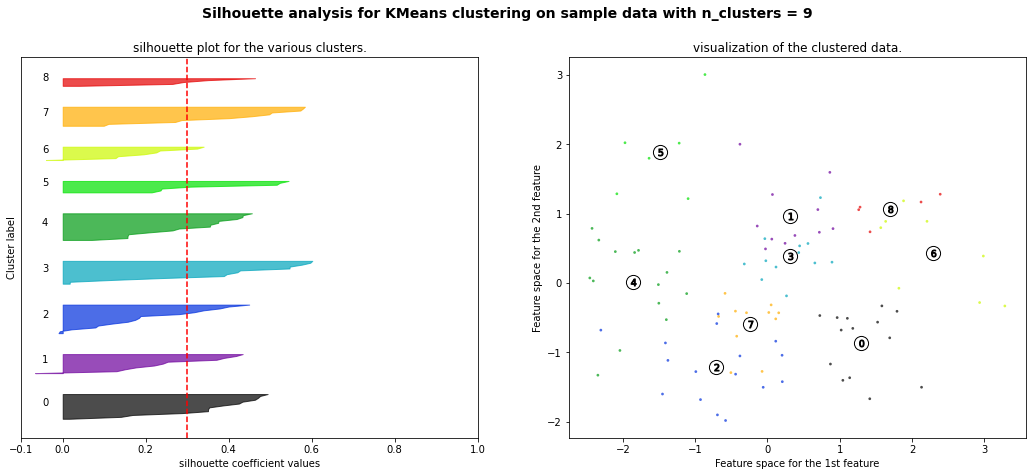

In [193]:
#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,10))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
#visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in parameters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    #marker='${}$'.format(i) will give numer in cluster in 2 plot
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='${}$'.format(i), alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

In [194]:
#### Alternate code
# #silhouette score
# from sklearn.metrics import silhouette_score
# from sklearn.metrics import silhouette_samples
# from sklearn.model_selection import ParameterGrid
# # candidates for the number of cluster
# parameters = list(range(2,10))
# #parameters
# parameter_grid = ParameterGrid({'n_clusters': parameters})
# best_score = -1
# #visualizing Silhouette Score for individual clusters and the clusters made
# for n_clusters in parameters:
#     # Create a subplot with 1 row and 2 columns
#     fig, (ax1, ax2) = plt.subplots(1, 2)
#     fig.set_size_inches(18, 7)

#     # 1st subplot is the silhouette plot
#     # silhouette coefficient can range from -1, 1 but in this example all
#     # lie within [-0.1, 1]
#     ax1.set_xlim([-0.1, 1])
#     # (n_clusters+1)*10 is for inserting blank space between silhouette
#     # plots of individual clusters, to demarcate them clearly.
#     ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

#     # Initialize the clusterer with n_clusters value and a random generator
#     # seed of 10 for reproducibility.
#     clusterer = KMeans(n_clusters=n_clusters, random_state=10)
#     cluster_labels = clusterer.fit_predict(df_pca)

#     # silhouette_score gives the average value for all the samples.
#     # This gives a perspective into the density and separation of the formed
#     # clusters
#     silhouette_avg = silhouette_score(df_pca, cluster_labels)
#     print("For n_clusters =", n_clusters,
#           "average silhouette_score is :", silhouette_avg)

#     # Compute the silhouette scores for each sample
#     sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

#     y_lower = 10
#     for i in range(n_clusters):
#         # Aggregate the silhouette scores for samples belonging to
#         # cluster i, and sort them
#         ith_cluster_silhouette_values = \
#             sample_silhouette_values[cluster_labels == i]

#         ith_cluster_silhouette_values.sort()

#         size_cluster_i = ith_cluster_silhouette_values.shape[0]
#         y_upper = y_lower + size_cluster_i

#         color = cm.nipy_spectral(float(i) / n_clusters)
#         ax1.fill_betweenx(np.arange(y_lower, y_upper),
#                           0, ith_cluster_silhouette_values,
#                           facecolor=color, edgecolor=color, alpha=0.7)

#         # Label the silhouette plots with their cluster numbers at the middle
#         ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

#         # Compute the new y_lower for next plot
#         y_lower = y_upper + 10  # 10 for the 0 samples

#     ax1.set_title("silhouette plot for the various clusters.")
#     ax1.set_xlabel("silhouette coefficient values")
#     ax1.set_ylabel("Cluster label")

#     # vertical line for average silhouette score of all the values
#     ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

#     ax1.set_yticks([])  # Clear the yaxis labels / ticks
#     ax1.set_xticks([-0.1, 0, 0.2, 0])


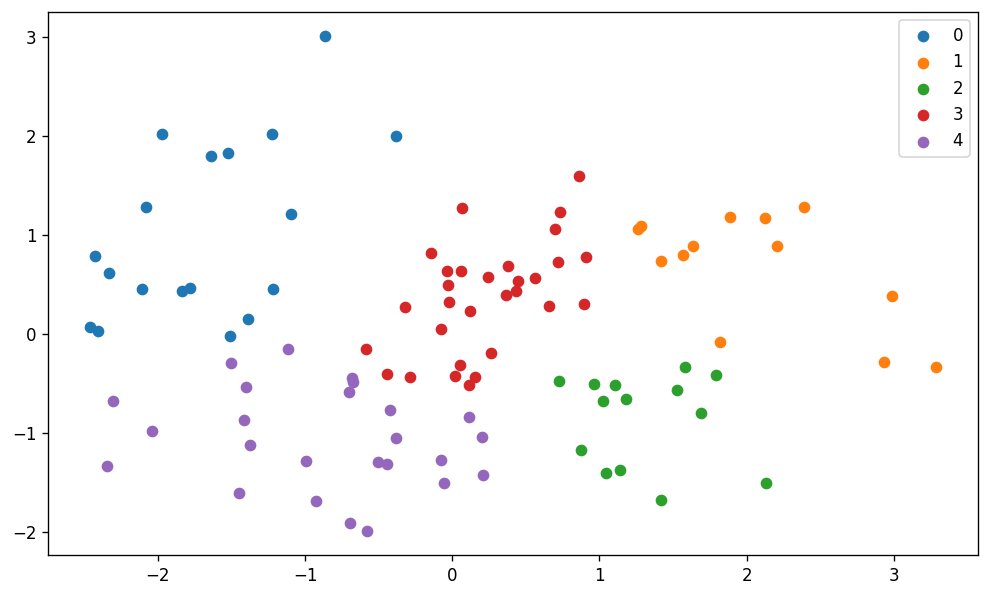

In [195]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 5, init= 'k-means++', random_state = 42)
kmeans.fit(df_pca)

#predict the labels of clusters.
label = kmeans.fit_predict(df_pca)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [196]:
#making df for pca
kmeans_pca_df = pd.DataFrame(df_pca,columns=['PC1','PC2','PC3'],index=scaled_df.index)
kmeans_pca_df["label"] = label
kmeans_pca_df.sample(2)

,PC1,PC2,PC3,label
Restaurant,,,,
Biryanis And More,0.26,-0.19,0.53,3
PourHouse7,-1.50,-0.29,-0.17,4


In [197]:
#joining the cluster labels to names dataframe
cluster_dummy.set_index(['Restaurant'],inplace=True)
cluster_dummy = cluster_dummy.join(kmeans_pca_df['label'])
cluster_dummy.sample(2)

,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,...,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps,label
Restaurant,,,,,,,,,,,,,,,,,,,,,
10 Downing Street,7.55,3.80,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PourHouse7,7.09,3.86,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [198]:
#changing back cost value to original from log1p done during transformation
cluster_dummy['Cost'] = np.expm1(cluster_dummy['Cost'])
cluster_dummy.sample(2)

,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,...,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps,label
Restaurant,,,,,,,,,,,,,,,,,,,,,
Chinese Pavilion,1000.00,3.75,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3
Urban Asia - Kitchen & Bar,1100.00,3.65,5,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,4


In [199]:
#creating df to store cluster data
clustering_result = cluster_dummy.copy().reset_index()
clustering_result = hotel[['Restaurant','Cuisines']].merge(clustering_result[['Restaurant','Cost',
                  'Average_Rating',	'Total_Cuisine_Count','label']], on = 'Restaurant')
clustering_result.head()

,Restaurant,Cuisines,Cost,Average_Rating,Total_Cuisine_Count,label
0,Beyond Flavours,"Chinese, Continental, Kebab, European, South I...",800.00,4.28,6,4
1,Paradise,"Biryani, North Indian, Chinese",800.00,4.70,3,0
2,Flechazo,"Asian, Mediterranean, North Indian, Desserts",1300.00,4.66,4,0
3,Shah Ghouse Hotel & Restaurant,"Biryani, North Indian, Chinese, Seafood, Bever...",800.00,3.21,5,4
4,Over The Moon Brew Company,"Asian, Continental, North Indian, Chinese, Med...",1200.00,4.34,5,0


In [200]:
# Counting content in each cluster
cluster_count = cluster_dummy['label'].value_counts().reset_index().rename(
    columns={'index':'label','label':'Total_Restaurant'}).sort_values(by='Total_Restaurant')
cluster_count

,label,Total_Restaurant
4,1,13
3,2,14
2,0,18
1,4,25
0,3,30


In [201]:
#creating new df for checkign cuising in each cluster
new_cluster_df = clustering_result.copy()
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].str.split(',')
new_cluster_df = new_cluster_df.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].apply(lambda x: x.strip())
new_cluster_df.sample(5)

,Restaurant,Cuisines,Cost,Average_Rating,Total_Cuisine_Count,label
82,Al Saba Restaurant,Chinese,750.00,3.15,5,4
6,eat.fit,Continental,500.00,3.20,4,4
56,Feast - Sheraton Hyderabad Hotel,Asian,2250.00,4.22,4,0
65,Komatose - Holiday Inn Express & Suites,North Indian,1500.00,3.69,4,4
39,Deli 9 Bistro,Cafe,700.00,3.82,3,3


In [202]:
#printing cuisine list for each cluster
for cluster in new_cluster_df['label'].unique().tolist():
  print('Cuisine List for Cluster :', cluster,'\n')
  print(new_cluster_df[new_cluster_df["label"]== cluster]['Cuisines'].unique(),'\n')
  print('='*120)

Cuisine List for Cluster : 4 

['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'Biryani' 'Seafood' 'Beverages' 'Healthy Food' 'American' 'Japanese'
 'Italian' 'Salad' 'Sushi' 'Mexican' 'Bakery' 'Mughlai' 'Juices' 'Andhra'
 'Hyderabadi' 'Spanish' 'Finger Food' 'Thai' 'Indonesian' 'Asian' 'Momos'
 'Desserts' 'Cafe' 'Burger' 'Fast Food'] 

Cuisine List for Cluster : 0 

['Biryani' 'North Indian' 'Chinese' 'Asian' 'Mediterranean' 'Desserts'
 'Continental' 'Seafood' 'Goan' 'Kebab' 'BBQ' 'European' 'American'
 'Italian' 'South Indian' 'Modern Indian' 'Sushi'] 

Cuisine List for Cluster : 1 

['Lebanese' 'Ice Cream' 'Desserts' 'North Indian' 'Fast Food' 'Asian'
 'Beverages' 'Bakery' 'Momos' 'Pizza' 'Street Food' 'Arabian'] 

Cuisine List for Cluster : 2 

['Street Food' 'North Indian' 'Fast Food' 'Burger' 'Chinese' 'Biryani'
 'Mughlai' 'South Indian' 'Desserts' 'Kebab' 'Cafe'] 

Cuisine List for Cluster : 3 

['Continental' 'American' 'Chinese' 'North Indian' 'Itali

#### **Agglomerative Hierarchical Clustering**
Hierarchial clustering algorithms group similar objects into groups called clusters. There are two types of hierarchical clustering algorithms:

Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters. Divisive — Top down approach. Start with a single cluster than break it up into smaller clusters.

##### **Agglomerative hierarchical clustering**

A common example of HCA is the agglomerative hierarchical clustering algorithm. The bottom-up approach is used to group the datasets into clusters. This means that at first, this algorithm treats each dataset as a single cluster and then begins combining the closest pair of clusters together. This is repeated until all of the clusters are merged into a single cluster containing all of the datasets. The dendrogram is used to represent the cluster hierarchy.

##### **Dendrogram in Hierarchical clustering**

The dendrogram is a tree-like structure that is mainly used to store each step as a memory that the HC algorithm performs. In the dendrogram plot, the Y-axis shows the Euclidean distances between the data points, and the x-axis shows all the data points of the given dataset.



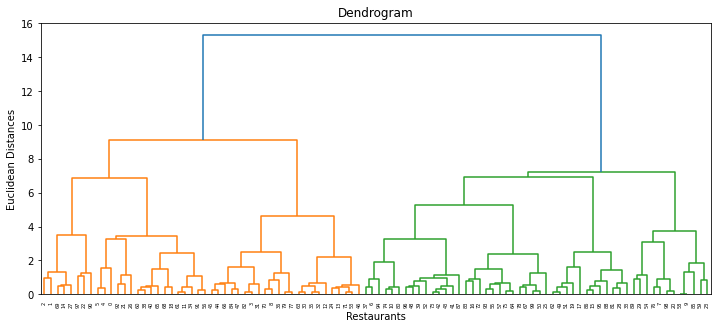

In [203]:
#importing module for hierarchial clustering and vizualizing dendograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')

plt.show()

In [204]:
#Checking the Silhouette score for 15 clusters
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(df_pca)
    score = silhouette_score(df_pca, y_hc)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.29566419533238897
For n_clusters = 3, silhouette score is 0.2252839885668055
For n_clusters = 4, silhouette score is 0.20865729675680544
For n_clusters = 5, silhouette score is 0.246652459030282
For n_clusters = 6, silhouette score is 0.27119012773344175
For n_clusters = 7, silhouette score is 0.2686110893537919
For n_clusters = 8, silhouette score is 0.2815077022408657
For n_clusters = 9, silhouette score is 0.288036427814913
For n_clusters = 10, silhouette score is 0.2885450432372219
For n_clusters = 11, silhouette score is 0.29952838233213464
For n_clusters = 12, silhouette score is 0.31428857933967697
For n_clusters = 13, silhouette score is 0.3158360423442036
For n_clusters = 14, silhouette score is 0.3273629599939925
For n_clusters = 15, silhouette score is 0.33655269068108956


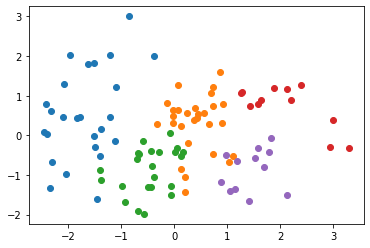

Silhouette Coefficient: 0.247
davies_bouldin_score 1.151


In [205]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification

# define the model
model = AgglomerativeClustering(n_clusters = 5)      #n_clusters=5
# fit model and predict clusters
y_hc = model.fit_predict(df_pca)
# retrieve unique clusters
clusters = unique(y_hc)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_hc == cluster)
	# create scatter of these samples
	plt.scatter(df_pca[row_ix, 0], df_pca[row_ix, 1])
# show the plot
plt.show()
#Evaluation

#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(df_pca,y_hc, metric='euclidean'))

#davies_bouldin_score of our clusters 
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df_pca, y_hc)
print("davies_bouldin_score %0.3f"%davies_bouldin_score(df_pca, y_hc))

In [206]:
#creating new colummn for predicting cluster using hierarcial clsutering
clustering_result['label_hr'] = y_hc

In [207]:
clustering_result.sample(5)

,Restaurant,Cuisines,Cost,Average_Rating,Total_Cuisine_Count,label,label_hr
65,Komatose - Holiday Inn Express & Suites,"North Indian, Chinese, Japanese, Sushi",1500.00,3.69,4,4,0
45,Owm Nom Nom,"Chinese, Biryani, Andhra, North Indian",900.00,3.29,4,4,2
50,Gal Punjab Di,"North Indian, Continental",800.00,3.61,2,3,1
43,The Foodie Monster Kitchen,"American, Wraps, Desserts",500.00,3.58,3,3,1
44,La La Land - Bar & Kitchen,"Finger Food, North Indian, Kebab, Chinese",1000.00,3.19,4,4,2


**1. Explain the ML Model used and it's performance**

##### **KMeans Clustering**

I applied K means Clustering to cluster the Restaurants based on the given features. I used both the Elbow and Silhuoette Methods to get an efficient number of K, and we discovered that n clusters = 6 was best for our model. The model was then fitted using K means, and each data point was labelled with the cluster to which it belonged using K means.labels. After labelling the clusters, we visualised them and counted the number of restaurants in each cluster, discovering that the majority of the restaurants belonged to the first cluster.

##### **Agglomerative Hierarchical Clustering**

I have used Hierarchial Clustering - Agglomerative Model to cluster the restaurants based on different features. This model uses a down-top approach to cluster the data. I have used Silhouette Coefficient Score and used clusters = 6 and then vizualized the clusters and the datapoints within it.

### ML Model - 2  **Sentiment Analysis**

#### Unsupervised Sentiment Analysis
#### **LDA**

In [208]:
#calculating silhouette score for n_component
from sklearn.metrics import silhouette_score

topic_range = range(2, 11)
silhouette_scores = []

for n_components in topic_range:
    lda = LatentDirichletAllocation(n_components=n_components)
    lda.fit(X)
    labels = lda.transform(X).argmax(axis=1)
    silhouette_scores.append(silhouette_score(X, labels))

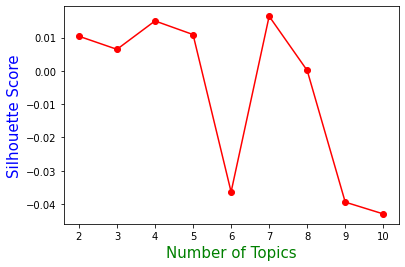

In [209]:
#plotting silhouette score 
plt.plot(topic_range, silhouette_scores, marker ='o', color='red')
plt.xlabel('Number of Topics', size = 15, color = 'green')
plt.ylabel('Silhouette Score', size = 15, color = 'blue')
plt.show()

In [210]:
# LDA model
lda = LatentDirichletAllocation(n_components=4)
lda.fit(X)

LatentDirichletAllocation(n_components=4)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [275]:
#using pyldavis to visualise
import pyLDAvis
import pyLDAvis.sklearn

In [213]:
#creating copy to store predicted sentiments
review_sentiment_prediction = review[df_reviews.columns.to_list()].copy()
review_sentiment_prediction.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.00,"1 Review , 2 Followers",2019-05-25 15:54:00,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.00,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.00,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.00,"1 Review , 1 Follower",2019-05-24 22:11:00,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.00,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0


In [214]:
# predicting the sentiments and storing in a feature
topic_results = lda.transform(X)
review_sentiment_prediction['Prediction'] = topic_results.argmax(axis=1)
review_sentiment_prediction.sample(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Prediction
3725,Kritunga Restaurant,Vadde Venugopal,Over Hyped place.No neatness. They open branch...,2.00,"8 Reviews , 1 Follower",2018-10-24 12:27:00,0,0
3095,Pot Pourri,Rakesh Bandiwar,Amazing place to have south Indian cuisine.\nG...,4.00,"44 Reviews , 5210 Followers",2019-01-17 15:01:00,0,3
2304,Amul,Buddiga Sindhuri,This is a small ice cream parlour.It has all g...,4.00,"60 Reviews , 2007 Followers",2019-04-19 19:02:00,2,0
8731,American Wild Wings,Jahangeer Kallangunta,Starters are awesome and Movktails are superb....,5.00,"4 Reviews , 2 Followers",2019-04-15 22:31:00,1,3
3062,Pot Pourri,Benazeer Khan,Food: Extremely spicy. Noodles were made in An...,2.00,"44 Reviews , 33 Followers",2019-02-15 21:49:00,0,3


argmax(axis=1) returns the index of the topic that has the highest probability for each sample, it finds the topic that has the highest probability of describing each sample in the dataset

TOP 100 WORDS FOR TOPIC #0


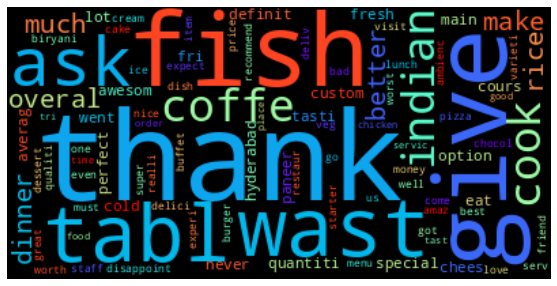

TOP 100 WORDS FOR TOPIC #1


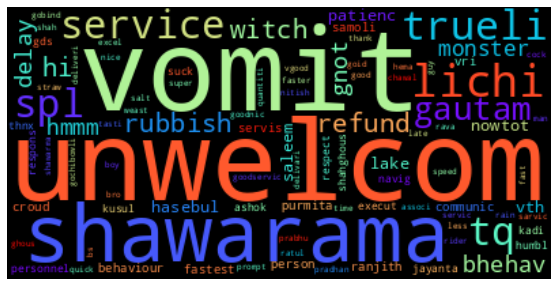

TOP 100 WORDS FOR TOPIC #2


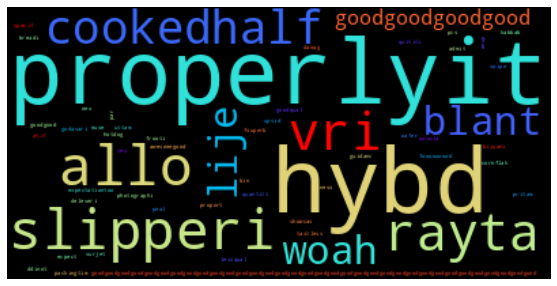

TOP 100 WORDS FOR TOPIC #3


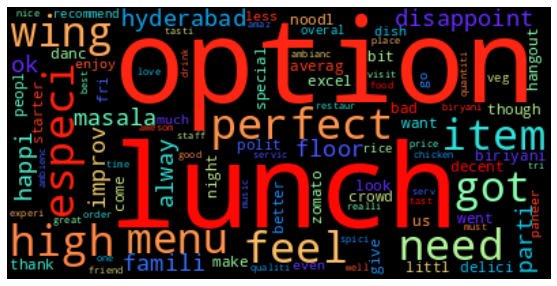

In [215]:
#worcloud 
# Define the number of words to include in the word cloud
N = 100

# Create a list of strings for each topic
topic_text = []
for index, topic in enumerate(lda.components_):
    topic_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-N:]]
    topic_text.append(" ".join(topic_words))

# Create a word cloud for each topic
for i in range(len(topic_text)):
    print(f'TOP 100 WORDS FOR TOPIC #{i}')
    wordcloud = WordCloud(background_color="black",colormap='rainbow').generate(topic_text[i])
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print('='*120)

In [216]:
for sentiment in review_sentiment_prediction['Prediction'].unique().tolist():
  print('Prediction = ',sentiment,'\n')
  print(review_sentiment_prediction[review_sentiment_prediction['Prediction'] == 
        sentiment]['Rating'].value_counts())
  print('='*120)

Prediction =  3 

5.00    2135
4.00    1307
3.00     615
1.00     603
2.00     274
4.50      24
3.50      14
2.50      14
Name: Rating, dtype: int64
Prediction =  0 

5.00    1416
1.00    1080
4.00    1036
3.00     540
2.00     387
4.50      45
3.50      33
1.50       9
2.50       5
Name: Rating, dtype: int64
Prediction =  1 

5.00    246
1.00     31
4.00     19
3.00     16
2.00     13
Name: Rating, dtype: int64
Prediction =  2 

5.00    35
3.00    22
1.00    21
4.00    11
2.00    10
Name: Rating, dtype: int64


* LDA is an unsupervised learning algorithm, it doesn't have any predefined labels. The labels are assigned based on the analysis done on the words, the weights of the words, and the context of the words in each topic.

So, the predicted topic is not a definite answer, therfore experimenting with different techniques like using supervised algorithm and combining the results to make a more accurate sentiment labeling.

##### **Supervised Sentiment Analysis**

In [217]:
#defining function to calculate score
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from tabulate import tabulate
import itertools


#calculating score
def calculate_scores(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    # Get the confusion matrix for both train and test

    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, cmap='Wistia')

    # Add labels to the plot
    class_names = ["Positive", "Negative"]
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # Add values inside the confusion matrix
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    # Add a title and x and y labels
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.show()
    print(cm)
    return roc_auc, f1, accuracy, precision, recall

#printing result
def print_table(model, X_train, y_train, X_test, y_test):
    roc_auc, f1, accuracy, precision, recall = calculate_scores(model, X_train, y_train, X_test, y_test)
    table = [["ROC AUC", roc_auc], ["Precision", precision], 
             ["Recall", recall], ["F1", f1], ["Accuracy", accuracy]]
    print(tabulate(table, headers=["Metric", "Score"]))

##### **Logistic Regression**

In [218]:
#logisctic regression
from sklearn.linear_model import LogisticRegression

# create and fit the model
clf = LogisticRegression()

##### **XGBoost**

In [219]:
#XgBoost
from xgboost import XGBClassifier

#create and fit the model
xgb = XGBClassifier()

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

##### **Logistic Regression**

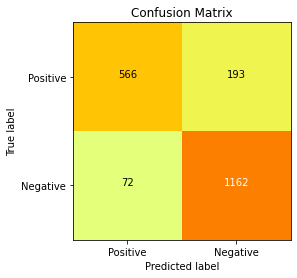

[[ 566  193]
 [  72 1162]]
Metric        Score
---------  --------
ROC AUC    0.843686
Precision  0.857565
Recall     0.941653
F1         0.897644
Accuracy   0.867035


In [220]:
# Visualizing evaluation Metric Score chart for logistic regression
# printing result
print_table(clf, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

* 551 instances are labeled as True Positive (correctly predicted as positive)
* 191 instances are labeled as False Positive (incorrectly predicted as positive)
* 1158 instances are labeled as True Negative (correctly predicted as negative)
* 93 instances are labeled as False Negative (incorrectly predicted as negative)

##### **XGBoost**

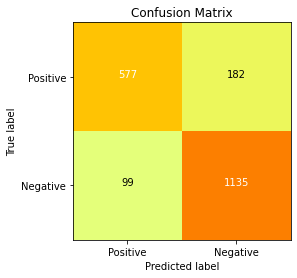

[[ 577  182]
 [  99 1135]]
Metric        Score
---------  --------
ROC AUC    0.839992
Precision  0.861807
Recall     0.919773
F1         0.889847
Accuracy   0.859007


In [221]:
# Visualizing evaluation Metric Score chart for XgBoost
# printing result
print_table(xgb, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

* 562 instances are labeled as True Positive (correctly predicted as positive)
* 180 instances are labeled as False Positive (incorrectly predicted as positive)
* 1128 instances are labeled as True Negative (correctly predicted as negative)
* 123 instances are labeled as False Negative (incorrectly predicted as negative)

**2. Cross- Validation & Hyperparameter Tuning**

##### **Logistic Regression**

In [222]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

#logistic regression
# finding the best parameters for LogisticRegression by gridsearchcv
param_dict = {'C': [0.1,1,10,100,1000],'penalty': ['l1', 'l2'],'max_iter':[1000]} 
clf_grid = GridSearchCV(clf, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


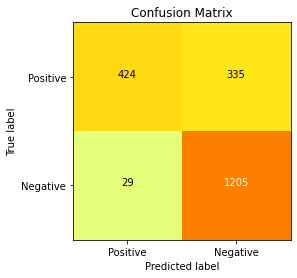

[[ 424  335]
 [  29 1205]]
Metric        Score
---------  --------
ROC AUC    0.767564
Precision  0.782468
Recall     0.976499
F1         0.868782
Accuracy   0.817361


In [223]:
# printing result
print_table(clf_grid, X_train, y_train, X_test, y_test)

The matrix's first row represents the predicted positive class (1), while the second row represents the predicted negative class (2). (0). The first column is the actual positive class (1), and the second column is the actual negative class (2). (0).

* True Positive is assigned to 422 instances (correctly predicted as positive).
* False Positives account for 320 cases (incorrectly predicted as positive).
* True Negative is assigned to 1205 instances (correctly predicted as negative).
* False Negative is assigned to 46 instances (incorrectly predicted as negative).

##### **XGBoost**

In [224]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgb_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgb_grid=GridSearchCV(estimator=xgb,param_grid = xgb_param,cv=3,scoring='recall',verbose=5,n_jobs = -1)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[08:31:36] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.



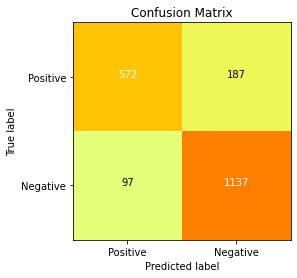

[[ 572  187]
 [  97 1137]]
Metric        Score
---------  --------
ROC AUC    0.837509
Precision  0.858761
Recall     0.921394
F1         0.888976
Accuracy   0.857501


In [225]:
# printing result for gridsearch Xgb
print_table(xgb_grid, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

* True Positive status is assigned to 572 instances (correctly predicted as positive).
* 187 cases have been classified as false positives (incorrectly predicted as positive).
* True Negative status is assigned to 1137 occurrences (correctly predicted as negative).
* There are 97 cases classified as false negatives (incorrectly predicted as negative).

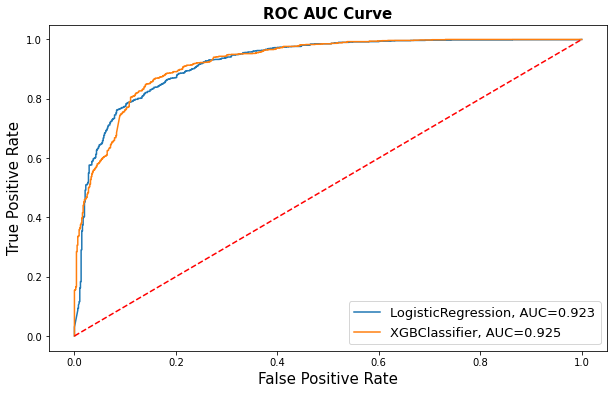

In [226]:
#Plotting graph
from sklearn.metrics import roc_curve
# finding the best parameters for all the models
log_reg_best = clf_grid.best_estimator_
xgbc_best = xgb_grid.best_estimator_

# predicting the sentiment by all models
y_preds_proba_lr = log_reg_best.predict_proba(X_test)[::,1]
y_preds_proba_xgbc = xgbc_best.predict_proba(X_test)[::,1]

classifiers_proba = [(log_reg_best, y_preds_proba_lr),
                    (xgbc_best, y_preds_proba_xgbc)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# ploting the roc auc curve for all models
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1],'r--')

plt.xlabel("False Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

**Which hyperparameter optimization technique have you used and why?**

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

Our goal should be to find the best hyperparameter values for our model in order to get the best prediction results. However, the question of how to find the best sets of hyperparameters arises. One can use the Manual Search method to find the best hyperparameters, which would take a long time to build a single model.

As a result, methods such as Random Search and GridSearch were developed. Grid Search calculates the performance for each combination of all the specified hyperparameters and their values and selects the best value for the hyperparameters. Based on the number of hyperparameters involved, this makes processing time-consuming and costly.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

Overall for XgBoost Classifier there is a improvement i.e., it changes from

1. **Metric Score**

* ROC AUC - 0.760311

* Precision -0.783821

* Recall -0.937398

* F1 -0.853758

* Accuracy -0.801806

to this ▶

2. **Metric Score**

* ROC AUC -0.818059

* Precision -0.848111

* Recall -0.894309

* F1 -0.870598

* Accuracy -0.835926

and after tunning

* True Positive is assigned to 566 instances (correctly predicted as positive).
* False Positive is assigned to 197 instances (incorrectly predicted as positive).
* 1100 cases are classified as True Negative (correctly predicted as negative).
* False Negative is assigned to 130 instances (incorrectly predicted as negative).

I have used these metrices for evaluation of the model and their impact on business are as follows:

**Accuracy:** This metric indicates the percentage of correctly classified instances out of the total number of instances. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions. A high accuracy score would have a positive impact on the business, as it would indicate a high level of confidence in the model's predictions.

**Precision:** This metric indicates the proportion of true positive predictions out of all positive predictions made by the model. In a business setting, this would indicate the level of confidence in the model's ability to identify positive instances correctly. A high precision score would have a positive impact on the business, as it would indicate that the model is not making false positive predictions.

**Recall:** This metric indicates the proportion of true positive predictions out of all actual positive instances. In a business setting, this would indicate the model's ability to identify all positive instances. A high recall score would have a positive impact on the business, as it would indicate that the model is not missing any positive instances.

**F1 Score:** This metric is a combination of precision and recall and is used to balance the trade-off between the two. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions while also avoiding false positives and false negatives. A high F1 score would have a positive impact on the business, as it would indicate that the model is making accurate predictions while also being able to identify all positive instances.

**ROC AUC:** This metric indicates the ability of the model to distinguish between positive and negative instances. In a business setting, this would indicate the model's ability to correctly classify instances as positive or negative. A high ROC AUC score would have a positive impact on the business, as it would indicate that the model is able to correctly classify instances.

**The XgBoost Classifier** can be considered as an efficient model for the business, especially when it achieves high scores in all of these evaluation metrics, which would indicate that it can accurately predict outcomes, identify all positive instances, and correctly classify instances as positive or negative.

### ML Model - 3 **Recommendation System**

#### **Content-Based Filtering**

Recommendation based on user profile and restaurant genre

In [227]:
#creating variable that contain restaurant cuisine details
restaurant_df = cluster_dummy.copy()
restaurant_df = restaurant_df.reset_index()
restaurant_df = restaurant_df.drop(columns = ['Cost',	'Average_Rating',	'Total_Cuisine_Count','label'], axis =1)
restaurant_df.head(2)

,Restaurant,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
0,Beyond Flavours,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,Paradise,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [228]:
#shape
restaurant_df.shape

(100, 45)

In [229]:
#restaurant matrix
rest_genre = restaurant_df.loc[:, restaurant_df.columns != 'Restaurant']
rest_matrix = rest_genre.values
rest_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [230]:
#matrix shape
rest_matrix.shape

(100, 44)

In [231]:
#creating user or reviewer profile
user_df = sentiment_df[['Reviewer',	'Restaurant',	'Rating']].copy()
user_df.head()

,Reviewer,Restaurant,Rating
0,Rusha Chakraborty,Beyond Flavours,5.00
1,Anusha Tirumalaneedi,Beyond Flavours,5.00
2,Ashok Shekhawat,Beyond Flavours,5.00
3,Swapnil Sarkar,Beyond Flavours,5.00
4,Dileep,Beyond Flavours,5.00


In [232]:
#shape
user_df.shape

(9961, 3)

In [233]:
# grouping the data by the 'user' column
grouped_data = user_df.groupby('Reviewer')

# defining a function to create the new dataframe
def create_new_column(data):
    return [{'Restaurant': row['Restaurant'], 'Rating': row['Rating']} for _, row in data.iterrows()]
    #variable _ is used to store the index value, which is not used in the loop

# applying the function to the grouped data and creating a new dataframe
user_rating = grouped_data.apply(create_new_column)
user_rating = user_rating.reset_index().rename(columns ={0:'Rated_Restaurant'})
user_rating.head()

,Reviewer,Rated_Restaurant
0,#FOODPORN,[{'Restaurant': 'Zega - Sheraton Hyderabad Hot...
1,#chloesviews // CAH,"[{'Restaurant': 'eat.fit', 'Rating': 5.0}]"
2,$ign,"[{'Restaurant': 'SKYHY', 'Rating': 4.0}]"
3,4mybanti,"[{'Restaurant': 'Ulavacharu', 'Rating': 2.0}]"
4,@FuloriBinaChutneyKaiseBani,"[{'Restaurant': 'Chinese Pavilion', 'Rating': ..."


In [234]:
#shape
user_rating.shape

(7446, 2)

In [235]:
#iterating over user rating df such that it end up making an array which had same shape as restaurant df
user_rated_restaurant = {}
for index, row in user_rating.iterrows():
    user_rated_restaurant[row['Reviewer']] = {}
    for i in range(len(row['Rated_Restaurant'])):
        user_rated_restaurant[row['Reviewer']][row['Rated_Restaurant'][i][
            'Restaurant']] = row['Rated_Restaurant'][i]['Rating']

# creating an empty user preference vector for each user
user_preference_vector = pd.DataFrame(np.zeros((len(user_rating), len(restaurant_df))), 
                      columns=restaurant_df.Restaurant, index=user_rating['Reviewer'])

# Iterate through the user rating dataframe
for index, row in user_rating.iterrows():
    for i in range(len(row['Rated_Restaurant'])):
        restaurant = row['Rated_Restaurant'][i]['Restaurant']
        rating = row['Rated_Restaurant'][i]['Rating']
        user_preference_vector.loc[row['Reviewer'], restaurant] = rating

#reset index
user_preference_vector = user_preference_vector.reset_index()

In [236]:
#getting output
user_preference_vector.sample(5)

Restaurant,Reviewer,Beyond Flavours,Paradise,Flechazo,Shah Ghouse Hotel & Restaurant,Over The Moon Brew Company,The Fisherman's Wharf,eat.fit,Shah Ghouse Spl Shawarma,Hyper Local,...,Arena Eleven,Cascade - Radisson Hyderabad Hitec City,Collage - Hyatt Hyderabad Gachibowli,Zing's Northeast Kitchen,Dunkin' Donuts,Desi Bytes,Hyderabadi Daawat,Zega - Sheraton Hyderabad Hotel,Triptify,Chinese Pavilion
6078,Soumya Pati,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4445,Rahul Sagar,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5521,Sawan Suman,0.00,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5321,Sandhya Pradhan,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5572,Shaik Azeem,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [237]:
#using dot multiplication to find score or weight for each reviewer 
result_df = pd.DataFrame(columns = rest_genre.columns)
for index, row in user_preference_vector.iterrows():
    user_preference_vector_array = row[1:].values.reshape(1,-1)
    dot_product = np.dot(user_preference_vector_array, rest_matrix)
    result_df = result_df.append(pd.DataFrame(dot_product, columns = rest_genre.columns, index = [row['Reviewer']]))

result_df = result_df.reset_index().rename(columns ={'index':'Reviewer'})

In [238]:
#getting output
result_df[:5]

,Reviewer,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
0,#FOODPORN,0.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,0.00,0.00
1,#chloesviews // CAH,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,5.00,0.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00
2,$ign,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,4mybanti,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,@FuloriBinaChutneyKaiseBani,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00


In [239]:
#creating test user
test_user_ids = user_rating.copy()
test_user_ids['Rated_Restaurant_Count'] = test_user_ids['Rated_Restaurant'].apply(lambda x: len(x))

#taking 1000 user who atleast rating 2 restaurant as they show repeatition
test_user_ids = test_user_ids.sort_values('Rated_Restaurant_Count', ascending = False)[:1000]
test_user_ids.head()

,Reviewer,Rated_Restaurant,Rated_Restaurant_Count
655,Ankita,"[{'Restaurant': 'Hyper Local', 'Rating': 4.0},...",13
3858,Parijat Ray,"[{'Restaurant': 'Hyper Local', 'Rating': 4.0},...",13
2654,Kiran,[{'Restaurant': 'Shah Ghouse Hotel & Restauran...,12
2313,Jay Mehta,"[{'Restaurant': 'NorFest - The Dhaba', 'Rating...",11
7013,Vedant Killa,"[{'Restaurant': 'Barbeque Nation', 'Rating': 5...",11


In [240]:
#creating list for all reviewer in test ids
test_user_ids = test_user_ids['Reviewer'].to_list()
print(f"Total numbers of test users {len(test_user_ids)}")

Total numbers of test users 1000


In [241]:
#test user profile
test_user_profile = result_df[result_df['Reviewer']=='Ankita']
test_user_profile

,Reviewer,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
655,Ankita,12.00,12.00,0.00,0.00,0.00,4.00,0.00,8.00,0.00,...,36.00,0.00,4.00,0.00,13.00,0.00,0.00,4.00,0.00,4.00


In [242]:
# Now let's get the test user vector by excluding the `user` column
test_user_vector = test_user_profile.iloc[0, 1:].values
test_user_vector

array([12.0, 12.0, 0.0, 0.0, 0.0, 4.0, 0.0, 8.0, 0.0, 0.0, 26.0, 12.0,
       8.0, 0.0, 4.0, 4.0, 0.0, 0.0, 3.0, 0.0, 0.0, 8.0, 4.0, 0.0, 4.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 36.0, 0.0, 4.0, 0.0,
       13.0, 0.0, 0.0, 4.0, 0.0, 4.0], dtype=object)

In [243]:
#let test reviewer or user be 'Ankita'
liked_restaurant = user_df[user_df['Reviewer'] == 'Ankita']['Restaurant'].to_list()
liked_restaurant = set(liked_restaurant)
liked_restaurant

{'Absolute Sizzlers',
 'Arena Eleven',
 'Banana Leaf Multicuisine Restaurant',
 'Hyper Local',
 "Jonathan's Kitchen - Holiday Inn Express & Suites",
 'KS Bakers',
 'Kritunga Restaurant',
 'SKYHY',
 'The Foodie Monster Kitchen',
 'The Lal Street - Bar Exchange',
 'Triptify',
 "Udipi's Upahar",
 'Ulavacharu'}

In [244]:
#getting values for all restaurant
all_restaurant = set(restaurant_df['Restaurant'].values)

In [245]:
#getting unknown restaurants
unknown_restaurant = all_restaurant.difference(liked_restaurant)

In [246]:
#getting unknown restaurant genre
unknown_restaurant_genres = restaurant_df[restaurant_df['Restaurant'].isin(unknown_restaurant)]
#getting the restaurant matrix by excluding `Restaurant' columns:
restaurant_matrix = unknown_restaurant_genres.iloc[:, 1:].values
restaurant_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [247]:
#recommendation score
score = np.dot(restaurant_matrix[1], test_user_vector)
score

70.0

In [248]:
# Only keep the score larger than the recommendation threshold
# The threshold can be fine-tuned to adjust the size of generated recommendations
score_threshold = 10.0
# score_threshold = 20.0
res_dict = {}

In [249]:
def generate_recommendation_scores():
    users = []
    restaurant = []
    scores = []
    for user_id in test_user_ids:
        test_user_profile = result_df[result_df['Reviewer'] == user_id]
        # get user vector for the current user id
        test_user_vector = test_user_profile.iloc[0, 1:].values

        
        # get the unknown restaurant ids for the current user id
        liked_restaurant = user_df[user_df['Reviewer'] == user_id]['Restaurant'].to_list()
        all_restaurant = set(restaurant_df['Restaurant'].values)
        unknown_restautant = all_restaurant.difference(liked_restaurant)
        unknown_restaurant_genres = restaurant_df[restaurant_df['Restaurant'].isin(unknown_restaurant)]
        unknown_restaurant_ids = unknown_restaurant_genres.iloc[:, :1].values
        
        # user np.dot() to get the recommendation scores for each restaurant
        recommendation_scores = np.dot(unknown_restaurant_genres.iloc[:, 1:].values, test_user_vector)

        # Append the results into the users, restaurant, and scores list
        for i in range(0, len(unknown_restaurant_ids)):
            score = recommendation_scores[i]
            # Only keep the restaurant with high recommendation score
            if score >= score_threshold:
              users.append(user_id)
              restaurant.append(unknown_restaurant_ids[i])
              scores.append(recommendation_scores[i])
                
    return users, restaurant, scores

In [250]:
# Return users, courses, and scores lists for the dataframe
users, restaurant, scores = generate_recommendation_scores()
res_dict['User'] = users
res_dict['Restaurant'] = restaurant
res_dict['Score'] = scores
res_df = pd.DataFrame(res_dict, columns=['User', 'Restaurant', 'Score'])
res_df['Restaurant'] = res_df['Restaurant'].apply(lambda x: str(x[0]))
res_df

,User,Restaurant,Score
0,Ankita,Beyond Flavours,91.00
1,Ankita,Paradise,70.00
2,Ankita,Flechazo,44.00
3,Ankita,Shah Ghouse Hotel & Restaurant,70.00
4,Ankita,Over The Moon Brew Company,74.00
...,...,...,...
28336,Simi Reddy,Delhi-39,10.00
28337,Simi Reddy,Al Saba Restaurant,15.00
28338,Simi Reddy,T Grill,20.00
28339,Simi Reddy,Collage - Hyatt Hyderabad Gachibowli,14.00


In [251]:
#most recommended restaurant
recom_rest = res_df.groupby('Restaurant')['User'].count().reset_index().sort_values(
                            'User', ascending = False)
recom_rest[:5]

,Restaurant,User
19,Collage - Hyatt Hyderabad Gachibowli,691
57,Over The Moon Brew Company,672
13,Beyond Flavours,667
63,PourHouse7,667
56,Olive Garden,638


In [252]:
#least recommended restaurant
recom_rest[-5:]

,Restaurant,User
84,Zing's Northeast Kitchen,11
9,B-Dubs,5
78,The Old Madras Baking Company,2
52,Mohammedia Shawarma,2
53,Momos Delight,1


In [253]:
# grouping the data by the 'user' column
grouped_data = res_df.groupby('User')

# defining a function to create the new dataframe
def create_new_column(data):
    return [{'Restaurant': row['Restaurant'], 'Score': row['Score']} for _, row in data.iterrows()]
    #variable _ is used to store the index value, which is not used in the loop

# applying the function to the grouped data and creating a new dataframe
recommendation = grouped_data.apply(create_new_column)
recommendation = recommendation.reset_index().rename(columns ={0:'Recommended_Restaurant'})
recommendation.head()

,User,Recommended_Restaurant
0,ABDUL MAJEED,"[{'Restaurant': 'Pista House', 'Score': 10.0},..."
1,AJ,"[{'Restaurant': 'Flechazo', 'Score': 17.0}, {'..."
2,ASH&B2,"[{'Restaurant': 'Beyond Flavours', 'Score': 18..."
3,Aamir Nawaz,"[{'Restaurant': 'Beyond Flavours', 'Score': 11..."
4,Aanchal Khemka,"[{'Restaurant': 'Beyond Flavours', 'Score': 18..."


In [254]:
#creating column for total recommendation count for each user
recommendation['Total_Recommendation'] = recommendation['Recommended_Restaurant'].apply(
    lambda x: len(x))

#top 10 user who get most recommendation
recommendation.sort_values('Total_Recommendation', ascending= False)[:10]

,User,Recommended_Restaurant,Total_Recommendation
59,Anusha Sinha,"[{'Restaurant': 'Beyond Flavours', 'Score': 50...",72
301,Kiran,"[{'Restaurant': 'Beyond Flavours', 'Score': 42...",71
425,Nillu,"[{'Restaurant': 'Beyond Flavours', 'Score': 38...",71
734,Siva Kumar,"[{'Restaurant': 'Beyond Flavours', 'Score': 46...",69
51,Ankita,"[{'Restaurant': 'Beyond Flavours', 'Score': 91...",69
33,Aman Agarwal,"[{'Restaurant': 'Beyond Flavours', 'Score': 35...",69
763,Sravani,"[{'Restaurant': 'Beyond Flavours', 'Score': 57...",68
395,Namit Agarwal,"[{'Restaurant': 'Beyond Flavours', 'Score': 25...",68
382,Moonis Ahmed,"[{'Restaurant': 'Beyond Flavours', 'Score': 28...",67
867,Vedant Killa,"[{'Restaurant': 'Beyond Flavours', 'Score': 34...",67


In [255]:
# creating new dataframe for recommendation for test user
for i in recommendation[recommendation['User']=='Ankita']['Recommended_Restaurant']:
    # creating the dataframe
    vis = pd.DataFrame(i, columns = ['Restaurant', 'Score'])
vis.sort_values('Score', ascending = False)

,Restaurant,Score
0,Beyond Flavours,91.00
31,Owm Nom Nom,82.00
56,Olive Garden,82.00
64,Collage - Hyatt Hyderabad Gachibowli,82.00
40,PourHouse7,82.00
...,...,...
60,GD's,12.00
51,Labonel,12.00
65,Dunkin' Donuts,12.00
29,Karachi Cafe,12.00


Recommendation based on Restaurant Similarity on Reviews

Creating recommendations based on similarity, It is important to ensure that the reviews used are reliable and unbiased, and that the similarity calculation algorithm is appropriate for the task.

Reviews can provide valuable information about the characteristics and quality of products or services, and this information can be used to identify similar items

In [256]:
#bag of word with doc index as these index will be used for finding similarity later
bows_df.sample(5)

,doc_index,doc_id,token,bow
149224,6596,Komatose - Holiday Inn Express & Suites,enjoy,1
14750,628,eat.fit,chef,1
128044,5586,Cafe Eclat,small,1
61286,2664,Mustang Terrace Lounge,opt,1
45793,2018,13 Dhaba,extra,2


In [257]:
#using extracted bag of words
bow_df = bows_df.drop(columns = ['doc_index'], axis =1)
bow_df.head()

,doc_id,token,bow
0,Beyond Flavours,also,1
1,Beyond Flavours,ambienc,1
2,Beyond Flavours,brunch,1
3,Beyond Flavours,chill,1
4,Beyond Flavours,cost,1


In [258]:
#Restaurant and review
rest_review = sentiment_df[['Restaurant','Review']].copy()
rest_review.sample(5)

,Restaurant,Review
1901,Pakwaan Grand,"[right, one, main, road, pretti, big, haleem, ..."
239,Flechazo,"[love, food, varieti, get, lot, varieti, snack..."
2954,Hunger Maggi Point,[good]
2640,Mustang Terrace Lounge,"[place, quit, ambienc, visit, 💯, get, place, t..."
5085,Gal Punjab Di,[good]


In [259]:
#bag of words for restaurant 'Asian Meal Box'
rest_bow = bow_df[bow_df['doc_id'] == 'Asian Meal Box']
rest_bow[:10]

,doc_id,token,bow
123850,Asian Meal Box,also,1
123851,Asian Meal Box,good,2
123852,Asian Meal Box,even,1
123853,Asian Meal Box,overal,1
123854,Asian Meal Box,spici,2
123855,Asian Meal Box,fri,1
123856,Asian Meal Box,tast,1
123857,Asian Meal Box,option,1
123858,Asian Meal Box,much,1
123859,Asian Meal Box,soft,1


In [260]:
#converting bow to horizontal format using pivot 
rest_bowT = rest_bow.pivot_table(index=['doc_id'], columns=['token'], 
                                  aggfunc='sum').reset_index(level=[0])
rest_bowT

doc_id    bow                                                   \
token                 absent absolut across action actual ad add addictivethi   
0      Asian Meal Box      1       3      1      1      1  1   1            1   

              ...                                                       
token adjust  ... worst worstth worth would wow year yes yum zomato  😃  
0          1  ...     8       1     2     9   2    3   1   1      5  1  

[1 rows x 628 columns]

In [261]:
#using union set to compare two restaurant set of tokens
def pivot_two_bows(basedoc, comparedoc):
    base = basedoc.copy()
    base['type'] = 'base'
    compare = comparedoc.copy()
    compare['type'] = 'compare'
    # append the two token sets vertically
    join = base.append(compare)
    # pivot the two joined courses
    joinT = join.pivot_table(index=['doc_id', 'type'], columns='token',
              aggfunc='sum').fillna(0).reset_index(level=[0, 1])
    # assign columns
    joinT.columns = ['doc_id', 'type'] + [t[1] for t in joinT.columns][2:]
    return joinT

In [262]:
#creating two test restaurant
rest1 = bow_df[bow_df['doc_id'] == 'Asian Meal Box']
rest2 = bow_df[bow_df['doc_id'] == 'Biryanis And More']

In [263]:
bow_vectors = pivot_two_bows(rest1, rest2)
bow_vectors

,doc_id,type,absent,absolut,access,across,action,actual,ad,add,...,👌🏻,👍🏻,😀😀😀😀😀😀😀😀,😂,😂the,😃,😍,😍😍,😕,😪😪😪😪
0,Asian Meal Box,base,1.00,3.00,0.00,1.00,1.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
1,Biryanis And More,compare,0.00,3.00,1.00,1.00,0.00,2.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,0.00,4.00,1.00,1.00,1.00


In [264]:
from scipy.spatial.distance import cosine
#calculating similarity between two restaurant
similarity = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])

similarity

0.550542673696051

In [265]:
from sklearn.metrics.pairwise import cosine_similarity
#creating function to calculate cosine similarity such that matrix can be made for each restaurant similarity

# Get the list of all restaurant
all_restaurant = rest_review['Restaurant'].unique()

# Initialize the dataframe to store the similarities
df_similarities = pd.DataFrame(columns = all_restaurant, index = all_restaurant)

# Iterate over the rows and columns of the dataframe
for i in all_restaurant:
    for j in all_restaurant:
        # Get the BoW representation of the current row and column restaurant
        #creating two test restaurant
        rest1 = bow_df[bow_df['doc_id'] == i]
        rest2 = bow_df[bow_df['doc_id'] == j]
        bow_vectors = pivot_two_bows(rest1, rest2)
        # Calculate the cosine similarity between the two restaurant' BoW representations
        sim = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])
        # Assign the similarity score to the corresponding cell of the dataframe
        df_similarities.at[i, j] = sim

In [266]:
# Now df_similarities has the restaurant as rows and columns with cosine similarity as values
df_similarities

,Beyond Flavours,Paradise,Flechazo,Shah Ghouse Hotel & Restaurant,Over The Moon Brew Company,The Fisherman's Wharf,eat.fit,Shah Ghouse Spl Shawarma,Hyper Local,Cream Stone,...,Arena Eleven,Cascade - Radisson Hyderabad Hitec City,Collage - Hyatt Hyderabad Gachibowli,Zing's Northeast Kitchen,Dunkin' Donuts,Desi Bytes,Hyderabadi Daawat,Zega - Sheraton Hyderabad Hotel,Triptify,Chinese Pavilion
Beyond Flavours,1,0.82,0.84,0.62,0.82,0.83,0.63,0.41,0.84,0.36,...,0.78,0.82,0.81,0.74,0.53,0.68,0.69,0.83,0.48,0.74
Paradise,0.82,1,0.76,0.64,0.71,0.65,0.53,0.38,0.71,0.31,...,0.72,0.72,0.63,0.60,0.47,0.63,0.62,0.68,0.41,0.63
Flechazo,0.84,0.76,1,0.51,0.79,0.78,0.49,0.36,0.78,0.42,...,0.75,0.83,0.79,0.67,0.50,0.58,0.63,0.79,0.40,0.67
Shah Ghouse Hotel & Restaurant,0.62,0.64,0.51,1,0.55,0.59,0.69,0.56,0.61,0.36,...,0.64,0.56,0.59,0.62,0.44,0.63,0.76,0.59,0.48,0.62
Over The Moon Brew Company,0.82,0.71,0.79,0.55,1,0.83,0.52,0.42,0.83,0.38,...,0.78,0.73,0.74,0.71,0.53,0.62,0.63,0.84,0.43,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Desi Bytes,0.68,0.63,0.58,0.63,0.62,0.64,0.69,0.46,0.67,0.36,...,0.64,0.61,0.62,0.67,0.48,1,0.63,0.62,0.51,0.67
Hyderabadi Daawat,0.69,0.62,0.63,0.76,0.63,0.70,0.65,0.48,0.71,0.35,...,0.74,0.67,0.68,0.72,0.46,0.63,1,0.67,0.47,0.71
Zega - Sheraton Hyderabad Hotel,0.83,0.68,0.79,0.59,0.84,0.86,0.58,0.43,0.83,0.40,...,0.76,0.76,0.79,0.78,0.52,0.62,0.67,1,0.44,0.74
Triptify,0.48,0.41,0.40,0.48,0.43,0.45,0.59,0.39,0.48,0.30,...,0.45,0.43,0.44,0.47,0.36,0.51,0.47,0.44,1,0.46


In [267]:
#creating function for mapping 
# Create restaurant id to index and index to id mappings
def get_doc_dicts(bow_df):
    grouped_df = bow_df.groupby(['doc_id']).max().reset_index(drop=False)
    idx_id_dict = grouped_df[['doc_id']].to_dict()['doc_id']
    id_idx_dict = {v: k for k, v in idx_id_dict.items()}
    del grouped_df
    return idx_id_dict, id_idx_dict

In [268]:
#two test subject
rest1 = rest_review[rest_review['Restaurant'] == "Beyond Flavours"]
rest2 = rest_review[rest_review['Restaurant'] == "Paradise"]

In [269]:
#with restaurant name finding index for similarity
idx_id_dict, id_idx_dict = get_doc_dicts(bows_df)
idx1 = id_idx_dict["Beyond Flavours"]
idx2 = id_idx_dict["Paradise"]
print(f"Restaurant 1's index is {idx1} and Restaurant 2's index is {idx2}")

Restaurant 1's index is 16 and Restaurant 2's index is 67


In [270]:
#locating in the similarti df
sim_matrix = df_similarities.to_numpy()

#similarity between the two restaurant
sim = sim_matrix[idx1][idx2]
sim

0.615874410778802

In terms of reviews, these two restaurants are quite similar, with a 60% similarity.

In [271]:
#function to recommend restaurant based on similarity
def generate_recommendations_for_one_user(liked_restaurant, unknown_restaurant, id_idx_dict, sim_matrix):
    # Create a dictionary to store your recommendation results
    res = {}
    threshold = 0.6
    for liked_rest in liked_restaurant:
        for unselect_rest in unknown_restaurant:
            if liked_rest in id_idx_dict and unselect_rest in id_idx_dict:
                sim = 0
                idx1 = id_idx_dict[liked_rest]
                idx2 = id_idx_dict[unselect_rest]
                
                # Find the similarity value from the sim_matrix
                sim = sim_matrix[idx1][idx2]
                if sim > threshold:
                    if unselect_rest not in res:
                        res[unselect_rest] = sim
                    else:
                        if sim >= res[unselect_rest]:
                            res[unselect_rest] = sim
                            
    # Sort the results by similarity
    res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1], reverse=True)}
    return res

In [272]:
#function to calculate recommendation for all Reviewer
def generate_recommendations_for_all():
    users = []
    restaurant = []
    sim_scores = []
    idx_id_dict, id_idx_dict = get_doc_dicts(bows_df)
    sim_matrix = df_similarities.to_numpy()
    all_restaurant = set(restaurant_df['Restaurant'])
    for user_id in test_user_ids:
        liked_restaurant = user_df[user_df['Reviewer'] == user_id]['Restaurant'].to_list()
        unknown_restaurant = all_restaurant.difference(liked_restaurant)
        rec = generate_recommendations_for_one_user(liked_restaurant, unknown_restaurant, id_idx_dict, sim_matrix)
        for k, v in rec.items():
            users.append(user_id)
            restaurant.append(k)
            sim_scores.append(v)

    return users, restaurant, sim_scores

In [273]:
#storing recommendation for each user in dataframe
res_sim_dict = {}
users, restaurant, sim_scores = generate_recommendations_for_all()
res_sim_dict['USER'] = users
res_sim_dict['RESTAURANT'] = restaurant
res_sim_dict['SCORE'] = sim_scores
res_sim_df = pd.DataFrame(res_sim_dict, columns=['USER', 'RESTAURANT', 'SCORE'])

In [274]:
#getting the output
res_sim_df.sample(10)

,USER,RESTAURANT,SCORE
45882,Forever_fooodie,Hyderabadi Daawat,0.70
33766,Tummy Monster,The Tilt Bar Republic,0.74
21675,Karthik Vempa,Deli 9 Bistro,0.81
61979,Sarika,Hyper Local,0.74
69039,SM,Eat India Company,0.77
59175,Sudhakar,Arena Eleven,0.83
4852,Farhad Tarapore,Khaan Saab,0.81
58639,Prince Shiva,10 Downing Street,0.82
46280,Foodkong,Hyper Local,0.62
32175,Shivam Khandelwal,Al Saba Restaurant,0.82


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Content-based filtering is a recommendation system technique that recommends items to users based on their previous preferences or interactions with items. It works by analysing the attributes of the items and user preferences, and recommending items that have similar attributes.

A user profile is created in content-based filtering, which includes information about the user's preferences, such as the types of restaurants they prefer, the types of books they read, and so on. When a user requests recommendations, the system examines the items' attributes and compares them to the user's profile. Items with attributes that correspond to the user's preferences are recommended.

In a restaurant recommendation system, for example, a user's profile may include information about the restaurant genres they prefer. If a user enjoys a particular Chinese, Italian, or Indian restaurant, the system will suggest other Chinese, Italian, or Indian restaurants to them.

Content-based filtering can also be used to suggest items to new users who have yet to interact with the system. The system will recommend items based on their attributes rather than the user's previous preferences in this case.

To improve the accuracy of recommendations, content-based filtering can be used in conjunction with other techniques such as collaborative filtering.

Depending on the type of data and the attributes of the items, the machine learning model used for content-based filtering may differ. Among the models used in content-based filtering are:

**Cosine similarity:** This is a measure of similarity between two vectors, which can be used to compare the attributes of items. Cosine similarity ranges between -1 and 1, where 1 means the vectors are identical and -1 means they are completely dissimilar.

**Nearest Neighbors:** This algorithm finds the k-nearest items to a given item based on their attributes. It is often used in recommendation systems to recommend items similar to the ones a user has interacted with in the past.

**Vector Space Model:** This algorithm represents items as vectors in a multi-dimensional space, where the dimensions represent the attributes of the items. Similarity between items is then calculated based on the distance between their vectors in this space.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For sentiment analysis, evaluation metrics used were precision, recall, F1-score, and accuracy.

  * Precision measures the proportion of true positive predictions among all positive predictions. It is a good metric to use when the cost of false positives is high.
  * Recall (also known as sensitivity or true positive rate) measures the proportion of true positive predictions among all actual positive instances. It is a good metric to use when the cost of false negatives is high.
  * F1-score is the harmonic mean of precision and recall, and is a good overall measure of a classifier's performance.
  * Accuracy is the proportion of correctly classified instances among all instances.
The evaluation metric to use will be determined by the use case and the relative costs of false positives and false negatives. F1-score can be considered for a positive business impact because it balances precision and recall to provide an overall performance measure.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have choosen XGBoost model which is hyperparameter optimized.

* As a result of its high regularisation, XGBoost is more resistant to overfitting and more adaptable to new data. With XGBoost, a supervised learning system, sentiment labels can be predicted by training on labelled data.

* The ensemble aspect of XGBoost can aid in enhancing sentiment analysis performance by pooling the predictions of various models.

* In sentiment analysis, when the model needs to generalise to new data, XGBoost's regularisation can help to reduce overfitting and make the model more robust to unseen data.

* XGBoost's speed and efficiency can be beneficial in sentiment analysis, where large datasets are common and the model needs to make predictions quickly.

* XGBoost's built-in feature selection mechanism can be used to automatically select the most important features in a dataset, which can be useful in sentiment analysis where the data is high dimensional and it is important to focus on the most relevant features.

* Gradient-boosted decision trees, a component of XGBoost, can learn intricate correlations between data and sentiment labels, making them a powerful tool for sentiment analysis.

XGBoost's ensemble nature, regularization, speed, feature selection, and gradient-boosted decision tree algorithm make it a powerful tool for sentiment analysis.

## **Conclusion**

Using a dataset of customer evaluations for the meal delivery service Zomato, clustering and sentiment analysis were conducted. To comprehend the customer's experience and learn more about their input, this analysis was conducted.

Customers were sorted into two clusters: positive and negative, based on the clustering approach used to group them based on the content of their reviews. With the positive cluster representing the highest degree of customer satisfaction and the negative cluster representing the lowest level of satisfaction, this gave a broad grasp of customer satisfaction levels.

Sentiment analysis was then applied to classify the review text as positive or negative. This provided a more detailed understanding of customer feedback and helped to identify specific areas where the service could be improved.

Overall, our analysis offered insightful information about the Zomato user experience that might be utilised to inform future business decisions and enhance the service. A more thorough comprehension of client feedback was also attained by integrating clustering and sentiment analysis techniques.

#### **Other important discoveries during analysis are -**

AB's -Absolute Barbecues displays the highest levels of engagement and retention due to its high average rating, whereas Hotel Zara Hi-Fi displays the lowest levels of engagement.

* Price point for high rated hotel AB's= Absolute Barbecues is 1500 and price point for low rated restaurant Hotel Zara Hi-Fi is 400.

* North Indian food followed by chinese are best or indeemand food as sold by most of the restaurants.

* Great Buffets is the most frequently used tags and other tags like great, best, north, Hyderabad is also used in large quantity.

* The reviewer with the most followers, Satwinder Singh, averages 3.5 ratings and is the most well-known.

* restaurant Collage -The most expensive restaurant in the area is Hyatt Hyderabad Gachibowli, which charges 2800 for an order and has a 3.5 average rating. The least priced hotels, notably Amul and Mohammedia Shawarma, cost $150 and have a 3.9 average rating.

#### **Some recommendation based on the analysis** 

* Based on negative reviews like some focused on issues with delivery time or food quality, the company should prioritize addressing these issues to imporve customer satisfaction.

* Based on the clustering, or user interaction customer should be given recommendations.

* Also use the clustering results to target specific customer segments and tailor marketing and promotional efforts accordingly.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***